# Exploratory Data Analysis

In [1]:
from google.colab import drive
drive.mount('./gdrive')

Drive already mounted at ./gdrive; to attempt to forcibly remount, call drive.mount("./gdrive", force_remount=True).


In [2]:
%%capture
import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!!pip install catboost

In [3]:
%matplotlib inline 
import os
import numpy as np                 # linear algebra
import pandas as pd                # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn as sk               # Useful in data analysis
import matplotlib.pyplot as plt
from sklearn import preprocessing
from datetime import date, timedelta
from pandas_profiling import ProfileReport

In [4]:
data_dir = "./gdrive/MyDrive/DataStorm-2.0/datasets"
trial_num = '02'                                        # change this when running different thing

train_df = pd.read_csv(os.path.join(data_dir, "Hotel-A-train.csv"))
valid_df = pd.read_csv(os.path.join(data_dir, "Hotel-A-validation.csv"))
test_df = pd.read_csv(os.path.join(data_dir, "Hotel-A-test.csv"))

### Data Insights

In [5]:
print(f'train dataset size :: {train_df.shape}')
print(f'valid dataset size :: {valid_df.shape}')
print(f'test dataset size :: {test_df.shape}')         # test dataset do not have the label (Reservation_Status)

train dataset size :: (27499, 24)
valid dataset size :: (2749, 24)
test dataset size :: (4318, 23)


In [6]:
attributes = list(train_df.columns)
print(attributes)

['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level', 'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin', 'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies', 'Meal_Type', 'Visted_Previously', 'Previous_Cancellations', 'Deposit_type', 'Booking_channel', 'Required_Car_Parking', 'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate']


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reservation-id          27499 non-null  int64 
 1   Gender                  27499 non-null  object
 2   Age                     27499 non-null  int64 
 3   Ethnicity               27499 non-null  object
 4   Educational_Level       27499 non-null  object
 5   Income                  27499 non-null  object
 6   Country_region          27499 non-null  object
 7   Hotel_Type              27499 non-null  object
 8   Expected_checkin        27499 non-null  object
 9   Expected_checkout       27499 non-null  object
 10  Booking_date            27499 non-null  object
 11  Adults                  27499 non-null  int64 
 12  Children                27499 non-null  int64 
 13  Babies                  27499 non-null  int64 
 14  Meal_Type               27499 non-null  object
 15  Vi

**Observations:** 
1. Data has Int and Object classes
2. No column as null/NaN values

In [8]:
valid_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reservation-id          2749 non-null   int64 
 1   Gender                  2749 non-null   object
 2   Age                     2749 non-null   int64 
 3   Ethnicity               2749 non-null   object
 4   Educational_Level       2749 non-null   object
 5   Income                  2749 non-null   object
 6   Country_region          2749 non-null   object
 7   Hotel_Type              2749 non-null   object
 8   Expected_checkin        2749 non-null   object
 9   Expected_checkout       2749 non-null   object
 10  Booking_date            2749 non-null   object
 11  Adults                  2749 non-null   int64 
 12  Children                2749 non-null   int64 
 13  Babies                  2749 non-null   int64 
 14  Meal_Type               2749 non-null   object
 15  Vist

**Observations:** 
1. Data has Int and Object classes
2. No column as null/NaN values

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reservation-id          4318 non-null   int64 
 1   Gender                  4318 non-null   object
 2   Age                     4318 non-null   int64 
 3   Ethnicity               4318 non-null   object
 4   Educational_Level       4318 non-null   object
 5   Income                  4318 non-null   object
 6   Country_region          4318 non-null   object
 7   Hotel_Type              4318 non-null   object
 8   Expected_checkin        4318 non-null   object
 9   Expected_checkout       4318 non-null   object
 10  Booking_date            4318 non-null   object
 11  Adults                  4318 non-null   int64 
 12  Children                4318 non-null   int64 
 13  Babies                  4318 non-null   int64 
 14  Meal_Type               4318 non-null   object
 15  Vist

**Observations:** 
1. Data has Int and Object classes
2. No column as null/NaN values

### Understanding Target variable

In [10]:
train_df.Reservation_Status.unique()

array(['Check-In', 'Canceled', 'No-Show'], dtype=object)

In [11]:
train_df.Reservation_Status.value_counts()

Check-In    21240
Canceled     4134
No-Show      2125
Name: Reservation_Status, dtype: int64

In [12]:
valid_df.Reservation_Status.value_counts()

Check-In    1610
Canceled     741
No-Show      398
Name: Reservation_Status, dtype: int64

### Checking for nulls and NaNs

In [13]:
# Train Dataframe
print(f'Train Series nulls :: {train_df.isnull().values.sum()}')
print(f'Train Series NaNs :: {train_df.isna().values.sum()}')

Train Series nulls :: 0
Train Series NaNs :: 0


In [14]:
# Validation Dataframe
print(f'Validation Series nulls :: {valid_df.isnull().values.sum()}')
print(f'Validation Series NaNs :: {valid_df.isna().values.sum()}')

Validation Series nulls :: 0
Validation Series NaNs :: 0


In [15]:
# Test Dataframe
print(f'Test Series nulls :: {test_df.isnull().values.sum()}')
print(f'Test Series NaNs :: {test_df.isna().values.sum()}')

Test Series nulls :: 0
Test Series NaNs :: 0


## Data Pre-processing

### Converting Date variables

In [16]:
#Convert Dates to continuous variables
def date_to_num(d):
    d = d.split('/')
    d = list(map(int, d))
    month, day, year = d
    ref_date = date(2015,1,1)
    cur_date = date(year,month,day)
    delta = cur_date - ref_date
    return delta.days

def date_to_month(d):
    d = d.split('/')
    d = list(map(int, d))
    month, day, year = d
    return month

def date_is_weekend(d1, duration):
    #Checks if the stay is during a weekend
    d1 = d1.split('/')
    d1 = list(map(int, d1))
    month, day, year = d1
    d = date(year, month, day)
    delt = timedelta(days = 1)
    for i in range(duration+1):
        cur_date = d + i*delt
        x = cur_date.weekday() #Monday = 0 Sunday = 6 etc. gets the weekday
        if x ==  5 or x == 6:
            return 1
    return 0

def booking_lag(book, checkin):
    lag =  checkin - book
    return lag.days

for df in [train_df, test_df, valid_df]:

    print ('starting dataset')
    df['in_day'] = df['Expected_checkin'].map(lambda d: date_to_num(d))
    df['out_day'] = df['Expected_checkout'].map(lambda d: date_to_num(d))
    df['duration'] = df['out_day'] - df['in_day']
    df['in_month'] = df['Expected_checkin'].map(lambda d: date_to_month(d))
    df['out_month'] = df['Expected_checkout'].map(lambda d: date_to_month(d))

    print ('calculating booking day lag')
    booking_day = df['Booking_date'].map(lambda d: date_to_num(d))
    df['book_month'] = df['Booking_date'].map(lambda d: date_to_month(d))
    df['booking_lag'] = df['in_day'] - booking_day
    df['weekend'] = df.apply(lambda d: date_is_weekend(d.Expected_checkin, d.duration), axis=1)
    

starting dataset
calculating booking day lag
starting dataset
calculating booking day lag
starting dataset
calculating booking day lag


In [17]:
train_df.columns

Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate',
       'in_day', 'out_day', 'duration', 'in_month', 'out_month', 'book_month',
       'booking_lag', 'weekend'],
      dtype='object')

In [18]:
#Generate a report of the data
# prof = ProfileReport(train_df)
# prof.to_file(output_file='report.html')

In [19]:
processed_train = train_df.copy(deep=True)
processed_val   = valid_df.copy(deep=True)
processed_test  = test_df.copy(deep=True)

map_dicts = {}

In [20]:
def check_sim(in_dfs, col):
    # checks for different features in different dataframes
    train_ = np.sort(in_dfs[0][col].unique())
    valid_ = np.sort(in_dfs[1][col].unique())
    test_  = np.sort(in_dfs[2][col].unique())
    if (train_ == valid_).all() and (train_ == test_).all():
        return True
    else:
        return False
    
def convert_categorical(col, in_dfs, out_dfs):
    # converts the categorical values to numerical labels
    enc = preprocessing.LabelEncoder()
    
    if check_sim(in_dfs, col):
        enc.fit(in_dfs[0][col]) # fits only on the train data features. 
    else:
        # if the three dataframes are having different features, should get a combined feature list
        features = []
        for i in range(len(in_dfs)):
          features += in_dfs[i][col].tolist()
        features = list(set(features))
        enc.fit(features)
    
    for n in range(len(out_dfs)):
        out_dfs[n][col] = enc.transform(in_dfs[n][col])
    
    return dict(zip(enc.classes_, enc.transform(enc.classes_)))

In [21]:
orderless_categoricals = ['Gender', 'Ethnicity','Country_region', 'Hotel_Type', 
                          'Meal_Type', 'Deposit_type', 'Booking_channel']

ordered_categoricals = ['Education_Level','Income']

In [22]:
for cat in orderless_categoricals:
    map_dicts[cat] = convert_categorical(cat, [train_df, valid_df, test_df], [processed_train, processed_val, processed_test])

### Converting the ordered categorical variables

In [23]:
processed_train['Educational_Level'].unique()

def educational_to_cat(level):
    if level == 'Mid-School':
        return 0
    elif level == 'High-School':
        return 1
    elif level == 'College':
        return 2
    elif level == 'Grad':
        return 3
    else:
        raise
        
processed_dfs = [processed_train, processed_test, processed_val]
map_dicts['Educational_Level'] = {'Mid-School':0, 'High-School':1, 'College':2, 'Grad':3}

for df in processed_dfs:
    df['Educational_Level'] = df['Educational_Level'].map(lambda d: educational_to_cat(d))

In [24]:
processed_train['Income'].unique()

def income_to_cat(level):
    if level == '<25K':
        return 0
    elif level == '25K --50K':
        return 1
    elif level == '50K -- 100K':
        return 2
    elif level == '>100K':
        return 3
    else:
        print (level)
        raise

processed_dfs = [processed_train, processed_test, processed_val]
map_dicts['Income'] = {'<25K':0, '25K --50K':1, '50K -- 100K':2, '>100K':3}

for df in processed_dfs:
    df['Income'] = df['Income'].map(lambda d: income_to_cat(d))

### Converting Boolean type variables

In [25]:
def bool_(out_df, col):
    map_ = {'yes':1, 'no':0}
    out_df[col] = out_df[col].str.lower()
    out_df[col] = out_df[col].map(map_)
    return

In [26]:
bool_cats = ['Visted_Previously','Previous_Cancellations','Required_Car_Parking','Use_Promotion']

for bol_ in bool_cats:
    bool_(processed_train, bol_)
    bool_(processed_val, bol_)
    bool_(processed_test, bol_)

In [27]:
def standarize(out_dfs, col):
  stand = sk.preprocessing.MinMaxScaler()
  stand.fit(out_dfs[0][col].to_numpy().reshape(-1, 1))

  for i in range(len(out_dfs)):
    out_dfs[i][col] = stand.transform(out_dfs[i][col].to_numpy().reshape(-1, 1))
  return

In [28]:
processed_train.columns

Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate',
       'in_day', 'out_day', 'duration', 'in_month', 'out_month', 'book_month',
       'booking_lag', 'weekend'],
      dtype='object')

### Adding Label Column

In [29]:
map_dicts['Reservation_Status'] = {'Check-In':1, 'Canceled':2, 'No-Show':3}

processed_train['Reservation_Status'] = train_df['Reservation_Status'].map(map_dicts['Reservation_Status'])
processed_val['Reservation_Status'] = valid_df['Reservation_Status'].map(map_dicts['Reservation_Status'])

## Data Visulaization

### Pearson's Correlation Matrix

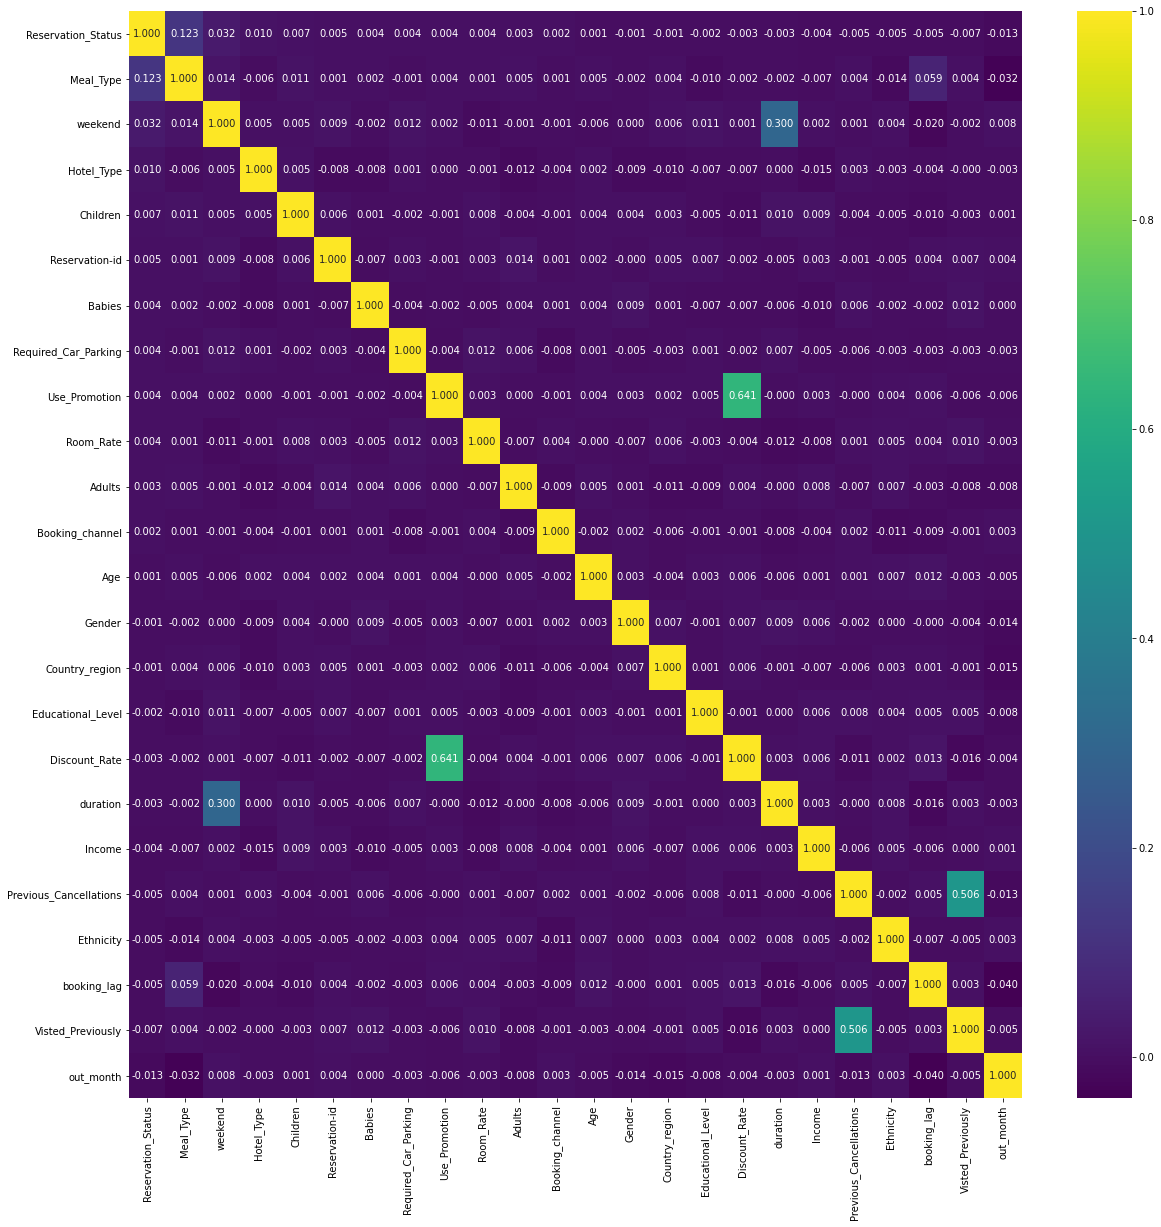

In [30]:
k = 24
cols = processed_train.corr().nlargest(k, 'Reservation_Status')['Reservation_Status'].index
cm = processed_train[cols].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, cmap = 'viridis', fmt = ".3f")

In [31]:
train_df.Hotel_Type.unique()

array(['City Hotel', 'Airport Hotels', 'Resort'], dtype=object)

Features to Engineer
1.   Categorical Feature with Previously visit and cancellation (4-categories)
2.   Continuous Variable - Discounted Rent
3.   Total Visitors came 
4.   Total Children (including babies)
5.   Business, Transit and Leisure Travelers (Based on Hotel type and duration)









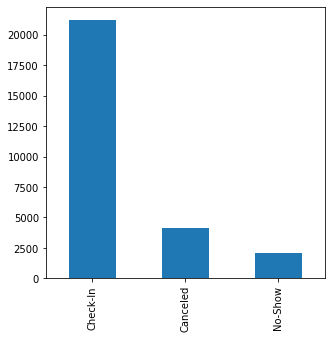

In [32]:
fig, ax = plt.subplots(figsize=(5,5))
train_df['Reservation_Status'].value_counts().plot(ax=ax, kind='bar')

In [33]:
train_canceled  = train_df.loc[train_df['Reservation_Status'] == 'Canceled']
train_noshow    = train_df.loc[train_df['Reservation_Status'] == 'No-Show']
train_checked   = train_df.loc[train_df['Reservation_Status'] == 'Check-In']

### Bar Plots for train_df

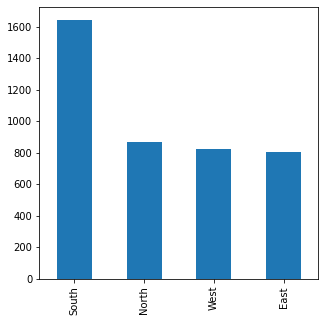

In [34]:
fig, ax = plt.subplots(figsize=(5,5))
train_canceled['Country_region'].value_counts().plot(ax=ax, kind='bar')

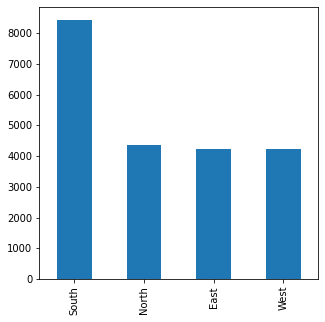

In [35]:
fig, ax = plt.subplots(figsize=(5,5))
train_checked['Country_region'].value_counts().plot(ax=ax, kind='bar')

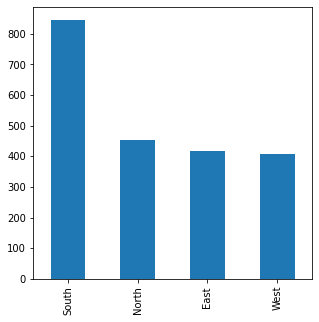

In [36]:
fig, ax = plt.subplots(figsize=(5,5))
train_noshow['Country_region'].value_counts().plot(ax=ax, kind='bar')

In [37]:
#Processed dataset 
processed_dfs = [processed_train, processed_val, processed_test]
processed_train.info()
processed_train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reservation-id          27499 non-null  int64 
 1   Gender                  27499 non-null  int64 
 2   Age                     27499 non-null  int64 
 3   Ethnicity               27499 non-null  int64 
 4   Educational_Level       27499 non-null  int64 
 5   Income                  27499 non-null  int64 
 6   Country_region          27499 non-null  int64 
 7   Hotel_Type              27499 non-null  int64 
 8   Expected_checkin        27499 non-null  object
 9   Expected_checkout       27499 non-null  object
 10  Booking_date            27499 non-null  object
 11  Adults                  27499 non-null  int64 
 12  Children                27499 non-null  int64 
 13  Babies                  27499 non-null  int64 
 14  Meal_Type               27499 non-null  int64 
 15  Vi

Reservation-id  Gender  Age  ...  book_month  booking_lag  weekend
0        39428300       0   40  ...           5           41        0
1        77491756       0   49  ...           5           36        0
2        73747291       0   42  ...           6            3        1
3        67301739       1   25  ...           6           12        0
4        77222321       0   62  ...           6           13        1

[5 rows x 32 columns]

### Feature Engineering

In [38]:
# based on previous vists and previous cancellations re_categorized
def previous_to_cat(cancel_state, visit_state):
  if cancel_state.lower() == 'no' and visit_state.lower() == 'no':
    return str(0)
  elif cancel_state.lower() == 'no' and visit_state.lower() == 'yes':
    return str(1)
  elif cancel_state.lower() == 'yes' and visit_state.lower() == 'yes':
    return str(2)
  else:
    return str(3)

In [39]:
for df in [train_df, valid_df, test_df]:
  df['prev_cat'] = df.apply(lambda x: previous_to_cat(x.Previous_Cancellations, x.Visted_Previously), axis=1)

In [40]:
# discounted rent
def discount_rent(rent, dis):
  return rent*(1-dis/100)

In [41]:
for df in [train_df, valid_df, test_df]:
  df['dis_count'] = df.apply(lambda x: discount_rent(x.Room_Rate, x.Discount_Rate), axis=1)

In [42]:
# Total visitors
def total_visit(adult, child, baby):
  return adult + child + baby

In [43]:
for df in [train_df, valid_df, test_df]:
  df['tot_visitors'] = df.apply(lambda x: total_visit(x.Adults, x.Children, x.Babies), axis=1)

In [44]:
# Total children
def total_child(child, baby):
  return child + baby

In [45]:
for df in [train_df, valid_df, test_df]:
  df['tot_child'] = df.apply(lambda x: total_child(x.Children, x.Babies), axis=1)

In [46]:
# Visitor category based on the meal, hotel and number of children 
def visitor_cat(hotel, meal, children):
  meals = ['BB','HB','FB']
  hotels = ['City Hotel', 'Airport Hotels', 'Resort']
  
  if hotel == hotels[1] and meal == meals[0]:
    return str(0)
  elif (hotel == hotels[0] or hotel == hotels[1]) and children < 2:
    return str(1)
  elif hotel == hotels[2] and children > 0:
    return str(2)
  else: return str(3)

In [47]:
for df in [train_df, valid_df, test_df]:
  df['visit_type'] = df.apply(lambda x: visitor_cat(x.Hotel_Type, x.Meal_Type, x.tot_child), axis=1)

In [48]:
# Drop redundant columns from the processed dfs
for df in processed_dfs:
    df.drop('Reservation-id', inplace = True, axis = 1, errors='ignore')
    df.drop('Expected_checkin', inplace = True, axis = 1)
    df.drop('Expected_checkout', inplace = True, axis = 1)
    df.drop('Booking_date', inplace = True, axis = 1)    

In [49]:
Engineered_cont = ['dis_count', 'tot_visitors', 'tot_child']

for indf, outdf in zip([train_df, valid_df, test_df], processed_dfs):
  outdf[Engineered_cont] = indf[Engineered_cont]

In [50]:
# Standarizing 
conts_data = ['Room_Rate', 'duration', 'booking_lag', 'in_day', 'out_day', 'dis_count']

for cat_ in conts_data:
  standarize(processed_dfs, cat_)

### Visualize relationship within categorical variables and output categories

In [51]:
orderless = ['Gender', 'Ethnicity', 'Country_region', 'Hotel_Type', 
              'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
              'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
              'Use_Promotion', 'in_month', 'out_month', 'weekend']

ordered = ['Educational_Level', 'Income', 'Adults', 'Children', 'Babies',
            'Discount_Rate', 'duration']

Engineered_cat = ['prev_cat', 'visit_type']

target = 'Reservation_Status'

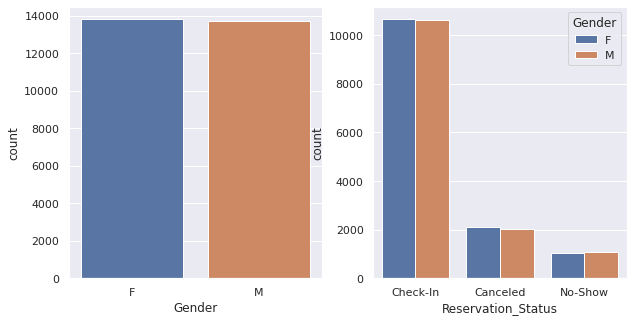

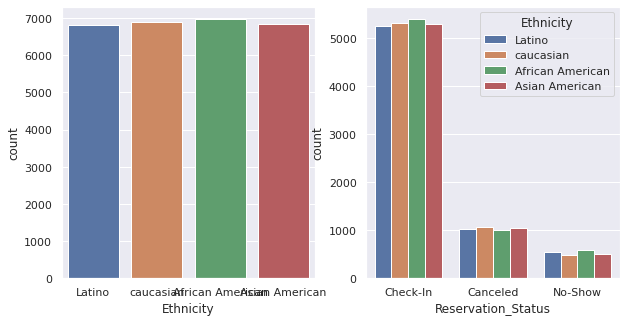

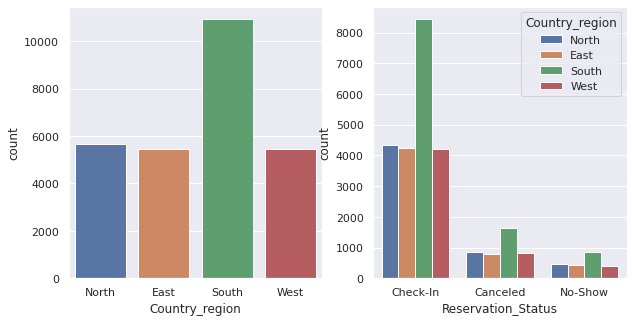

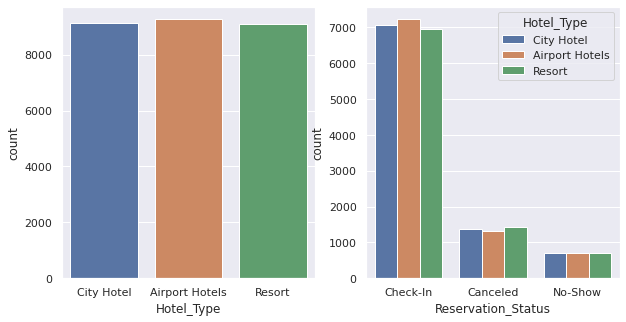

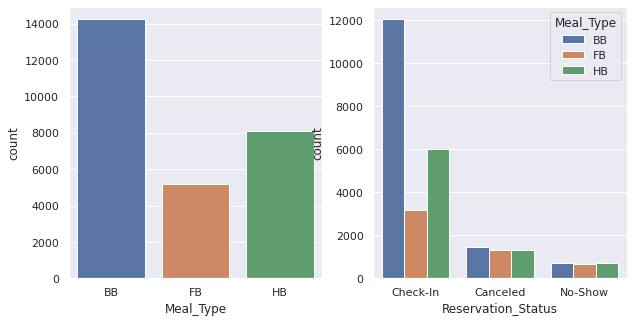

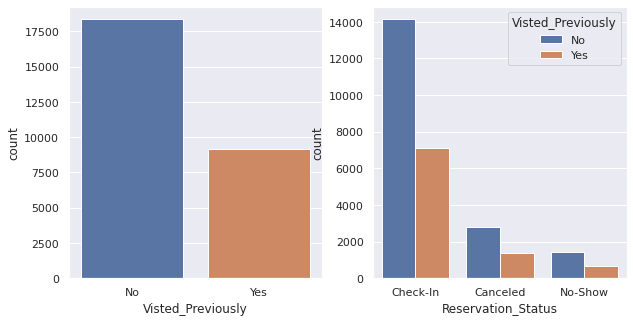

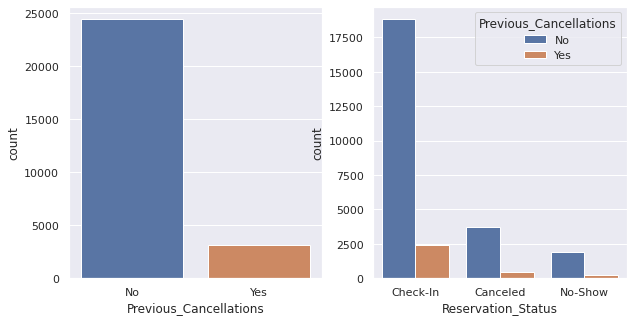

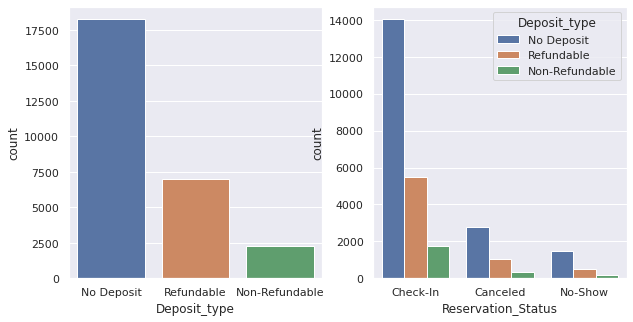

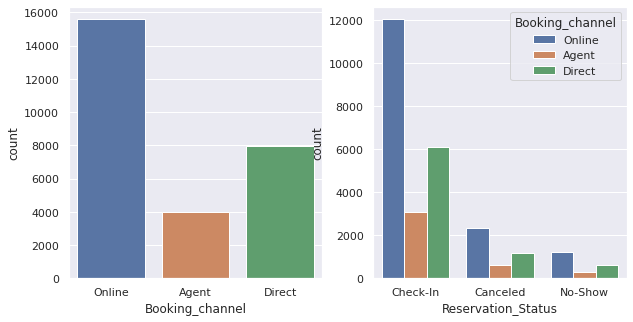

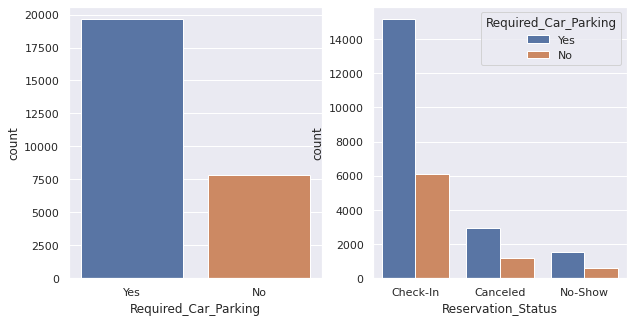

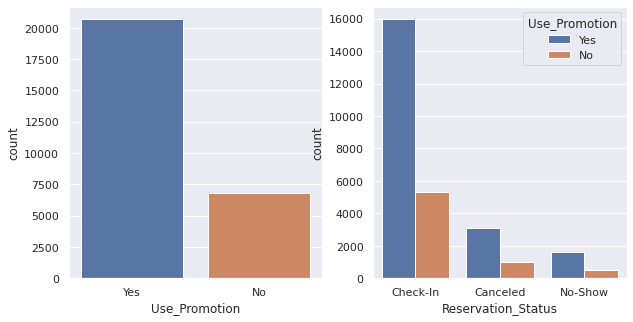

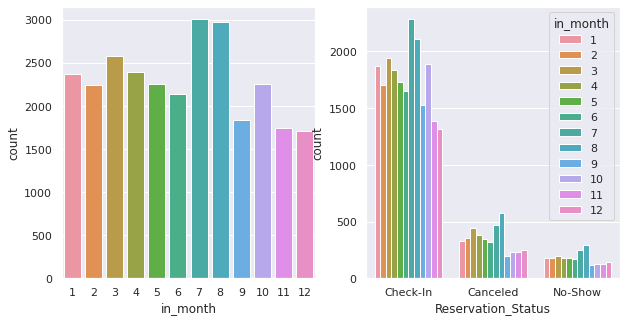

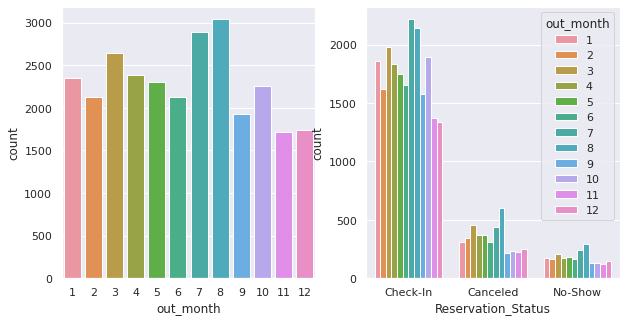

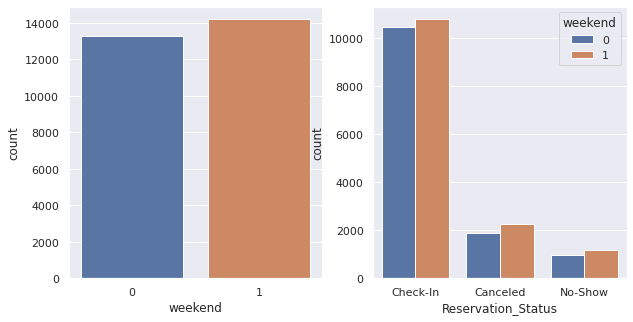

In [52]:
sns.set()
for i, cat in enumerate(orderless):
    plt.figure(i, figsize=(10,5))
    plt.subplot(1,2,1)
    sns.countplot(x=cat, data=train_df)
    counts = train_df[cat].value_counts()
    plt.subplot(1,2,2)
    sns.countplot(x=target, hue=cat, data=train_df)

In [53]:
def normalize_for_plot(df, c,t):
    c_keys = df[c].unique()
    t_keys = df[t].unique()
    heatmap = np.zeros((len(t_keys), len(c_keys)))
    heatmap = pd.DataFrame(heatmap, index = ['No-Show', 'Canceled', 'Check-In'], columns = sorted(c_keys), dtype='float')
    groups = df.groupby([c,t]).size().astype('float')
    ratios = df[t].value_counts(normalize = True)
    for ci in c_keys:
        total = groups[ci].sum()
        for ti in t_keys:
            heatmap[ci][ti] = float(groups[ci][ti])/(total*ratios[ti])
    heatmap -=1
    return heatmap


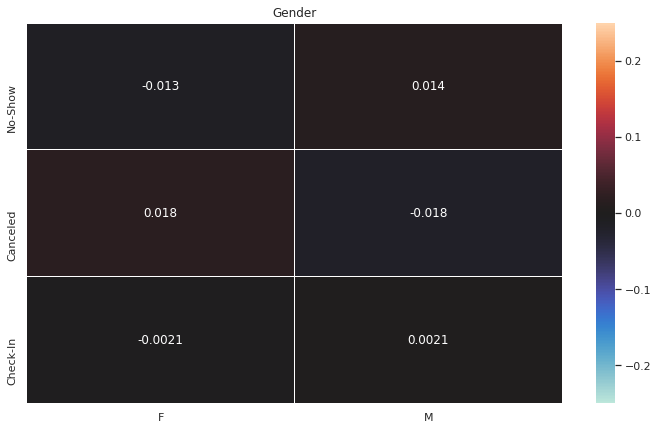

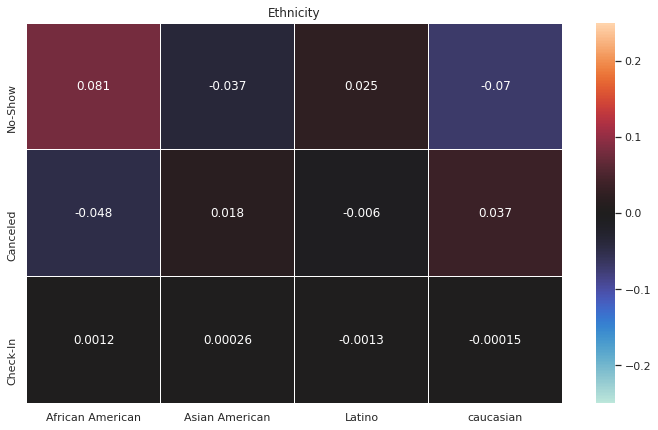

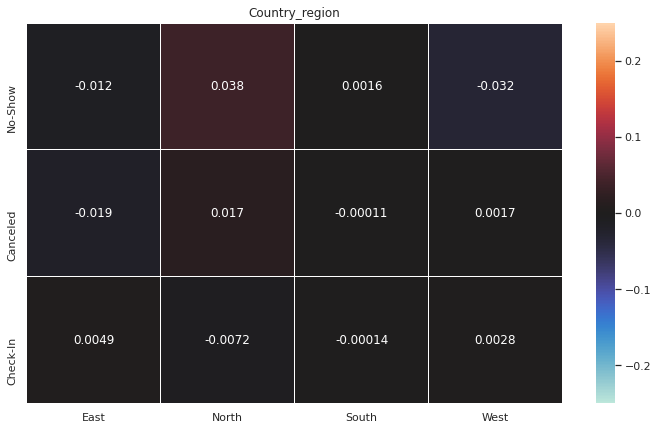

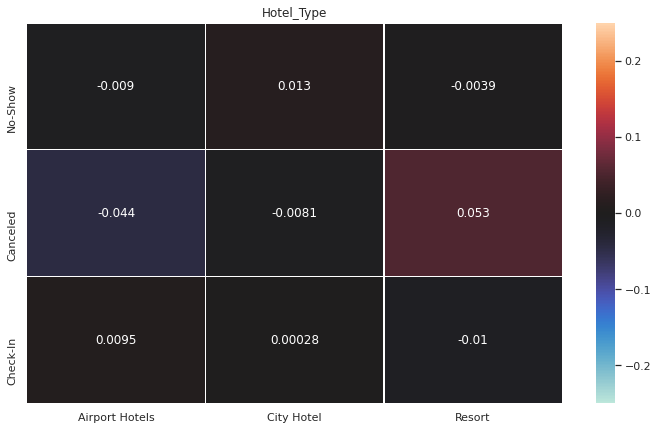

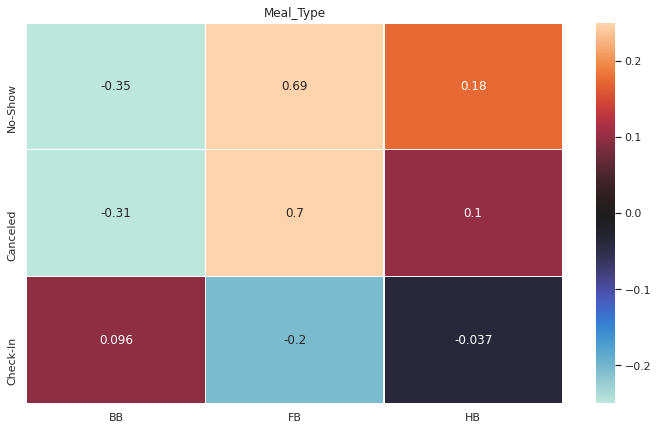

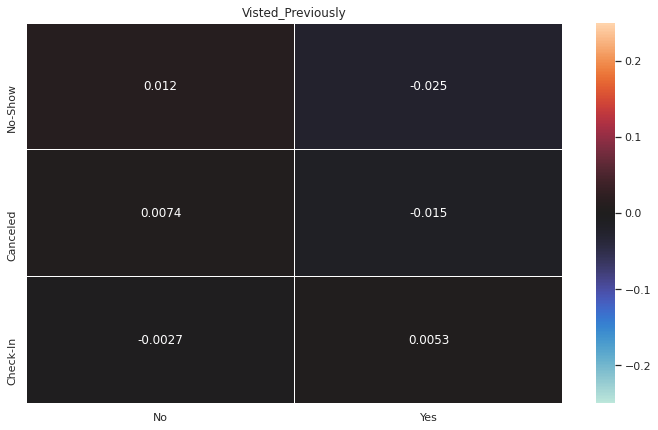

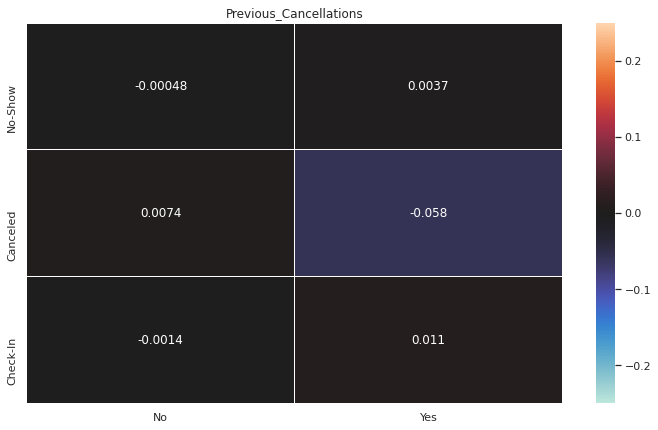

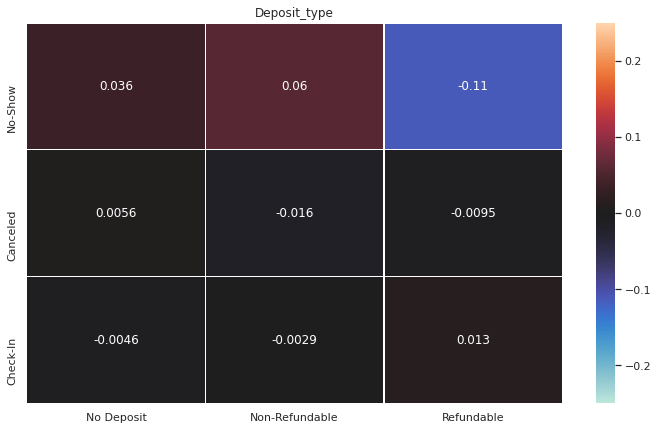

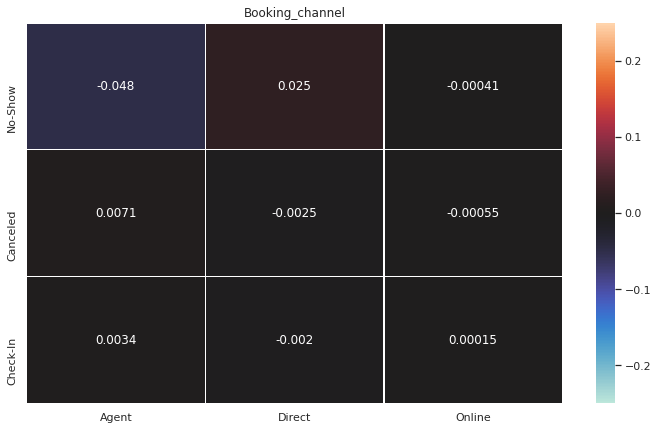

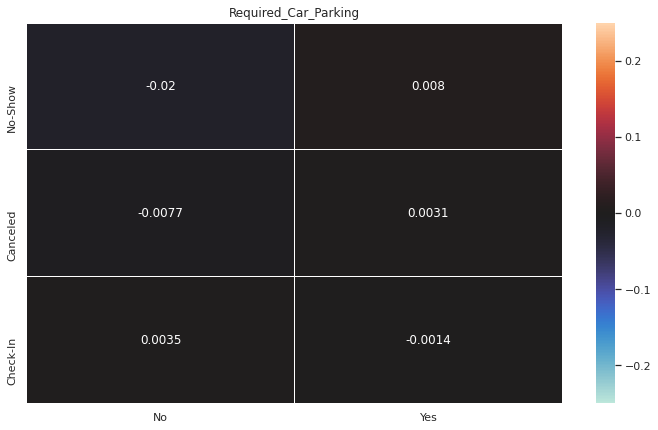

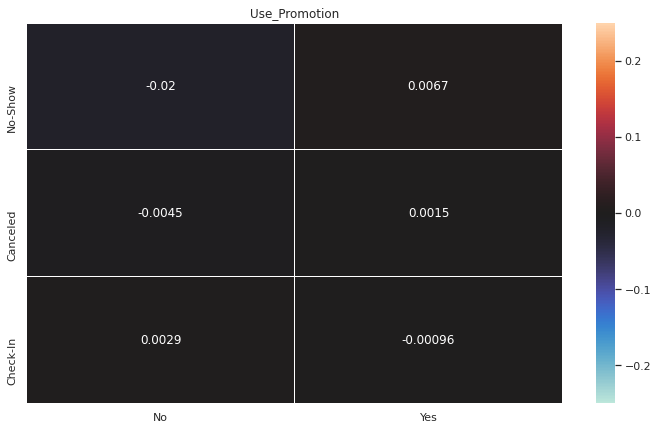

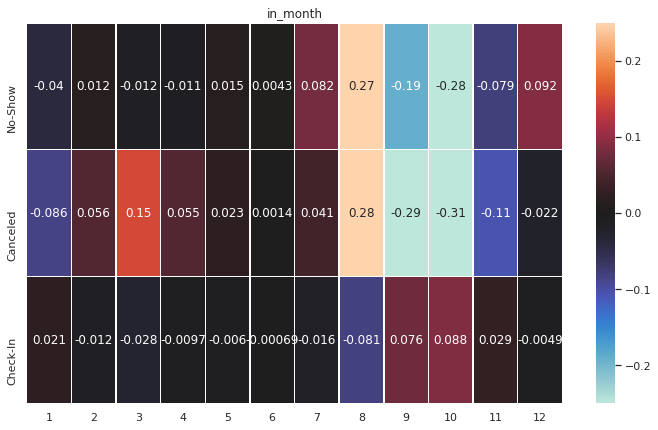

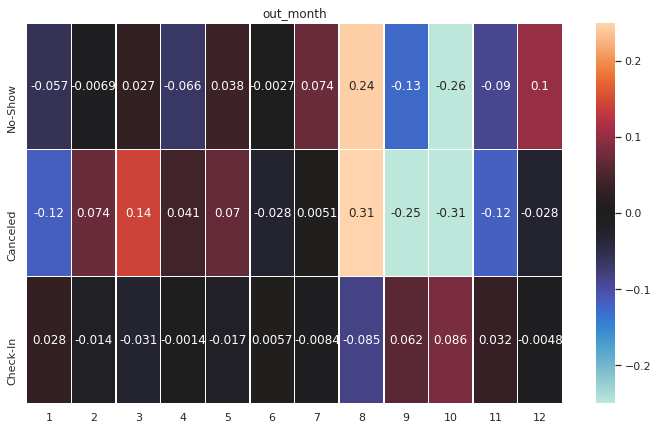

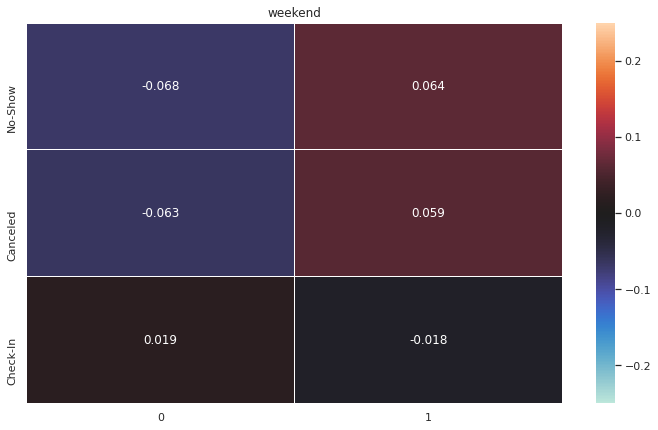

In [54]:
target = 'Reservation_Status'
for i, cat in enumerate(orderless):
    g = normalize_for_plot(train_df, cat, target)
    plt.figure(i, figsize=(12,7))
    sns.heatmap(g, linewidths=0.5, vmin = -0.25, vmax = 0.25, center = 0.0, annot=True).set_title(cat)

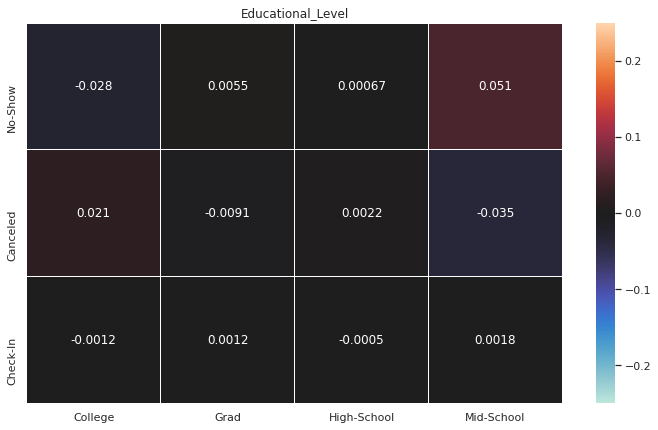

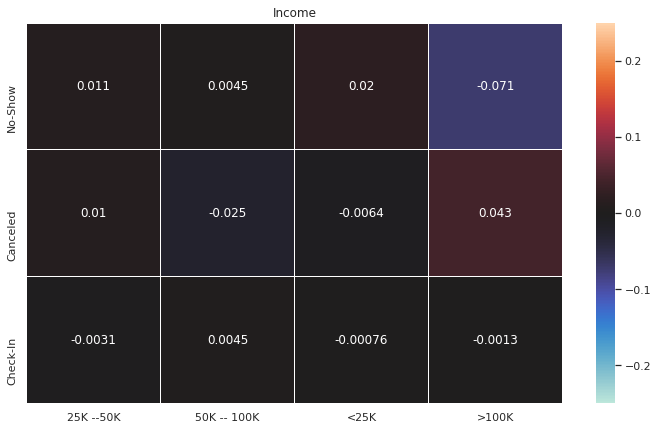

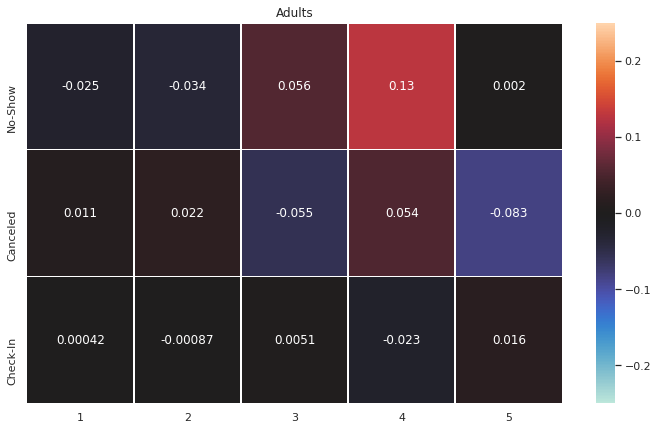

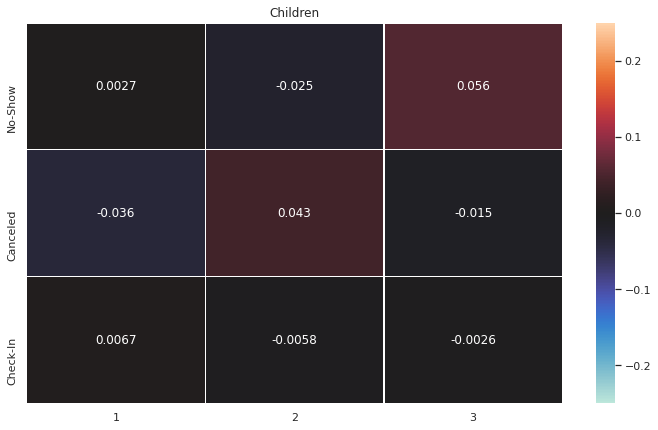

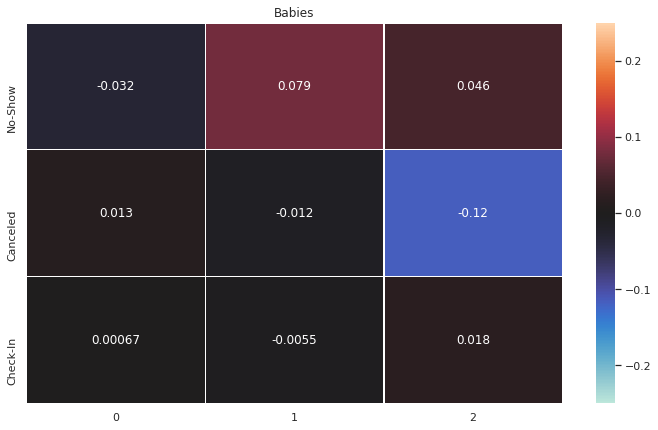

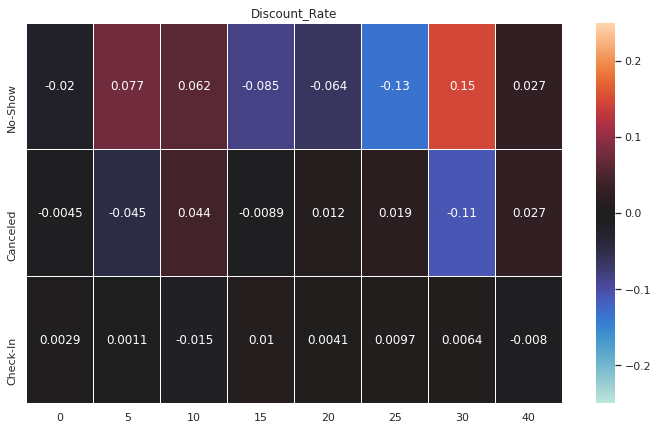

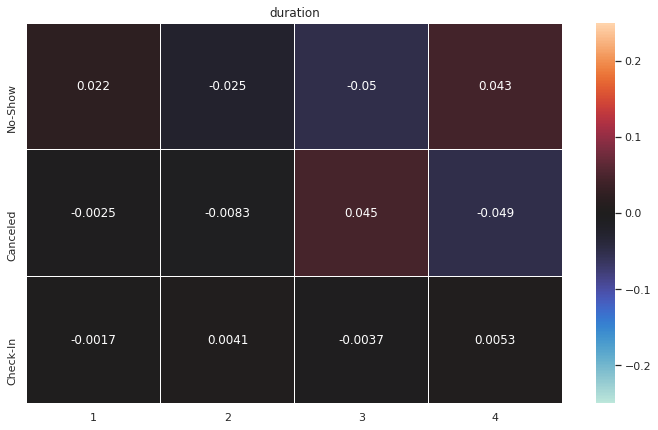

In [55]:
target = 'Reservation_Status'
for i, cat in enumerate(ordered):
    g = normalize_for_plot(train_df, cat, target)
    plt.figure(i, figsize=(12,7))
    sns.heatmap(g, linewidths=0.5, vmin = -0.25, vmax = 0.25, center = 0.0, annot=True).set_title(cat)

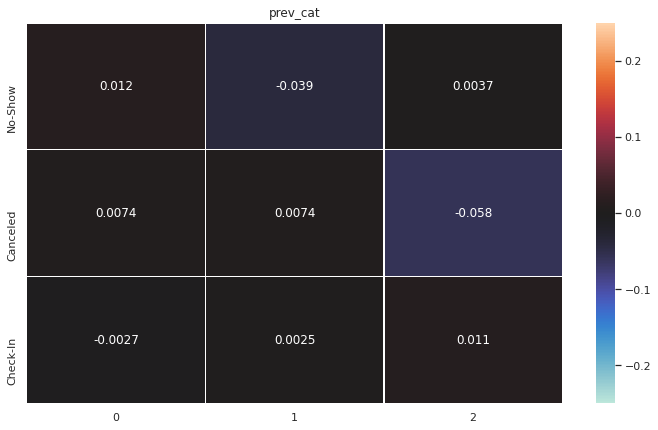

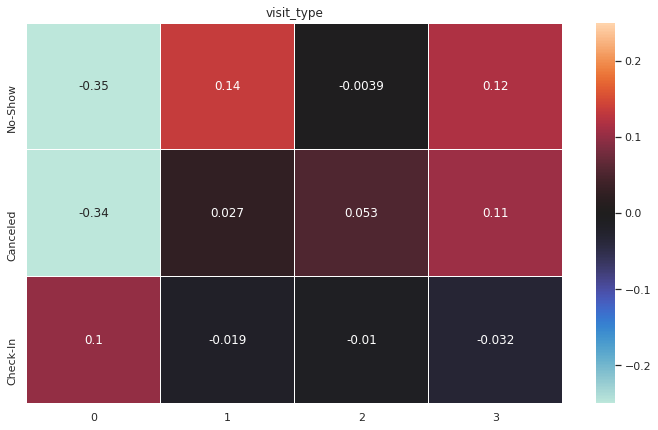

In [56]:
target = 'Reservation_Status'
for i, cat in enumerate(Engineered_cat):
    g = normalize_for_plot(train_df, cat, target)
    plt.figure(i, figsize=(12,7))
    sns.heatmap(g, linewidths=0.5, vmin = -0.25, vmax = 0.25, center = 0.0, annot=True).set_title(cat)

### Plot Continuous Variables with the dependent variables. Use Violin plots, scatter plots, and bar charts

In [57]:
continuous = ['Age', 'Adults', 'Children', 'Babies', 'Discount_Rate', 'Room_Rate', 'duration', 'booking_lag']

### Violin Plots

Based on the data distributions w.r.t. the three reservation statuses, we can see the following variables do not provide distinct patterns to differentiate the three categories.

1. Age
2. Adults
3. Children
4. Babies
5. Room_Rate
6. duration
7. tot_child

<Figure size 720x504 with 0 Axes>

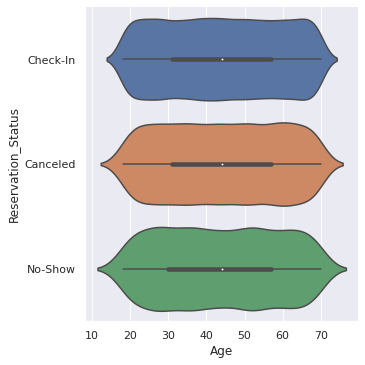

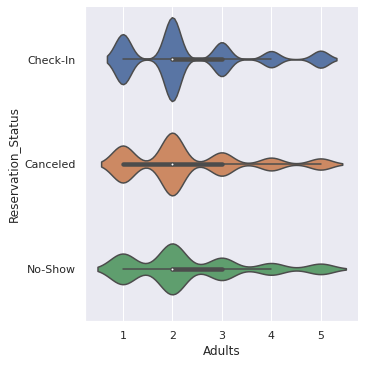

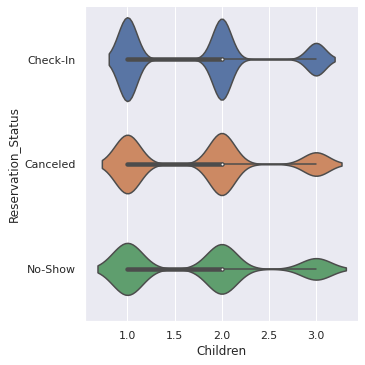

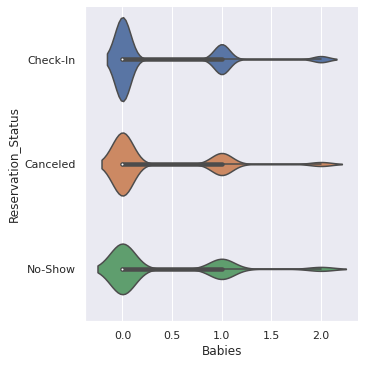

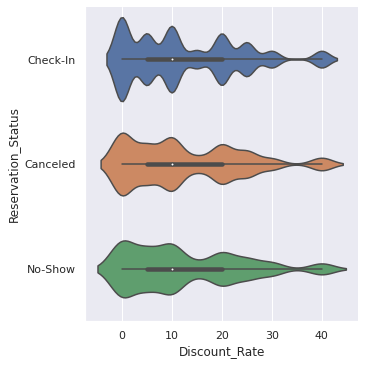

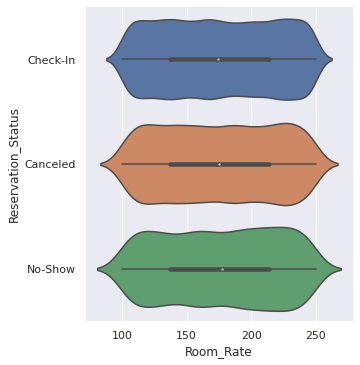

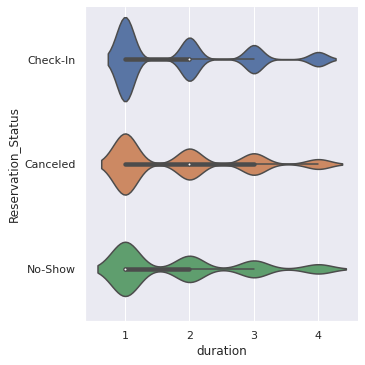

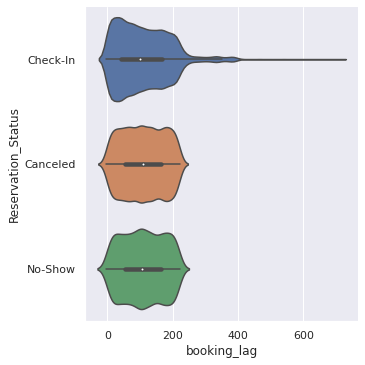

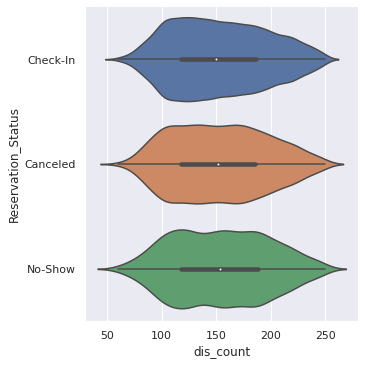

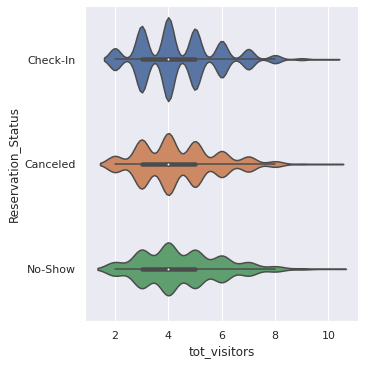

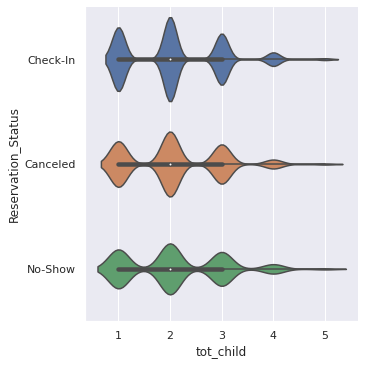

In [58]:
for i,cat in enumerate(continuous+Engineered_cont):
    plt.figure(i, figsize=(10,7))
    sns.catplot(x=cat, y=target, data=train_df, kind='violin')

### Bar charts

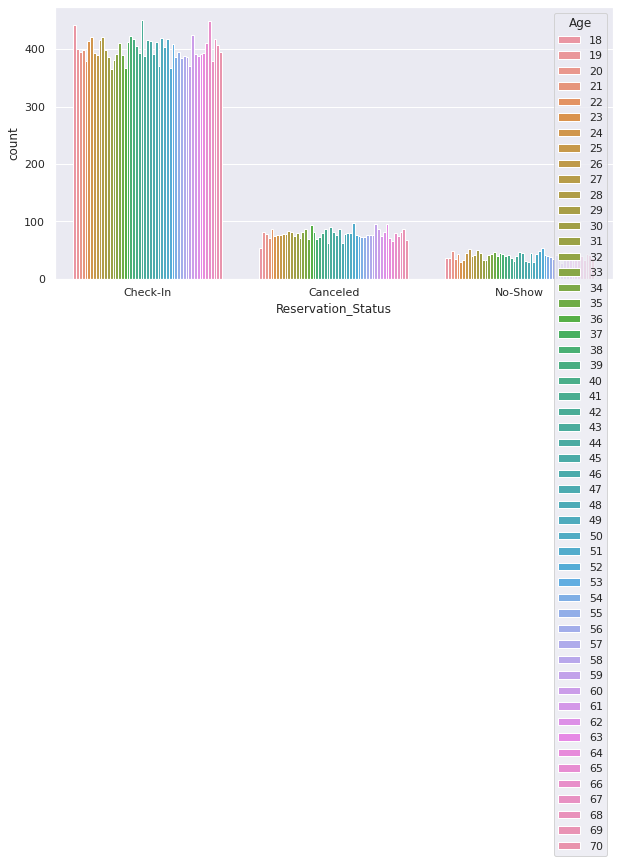

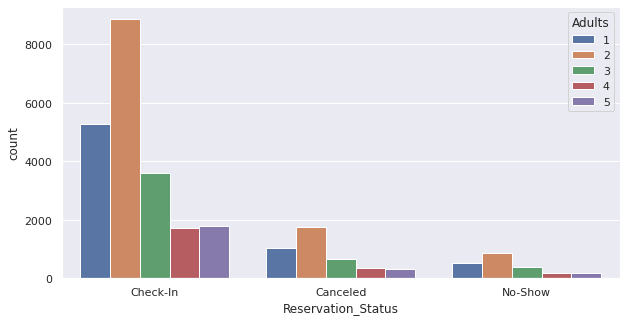

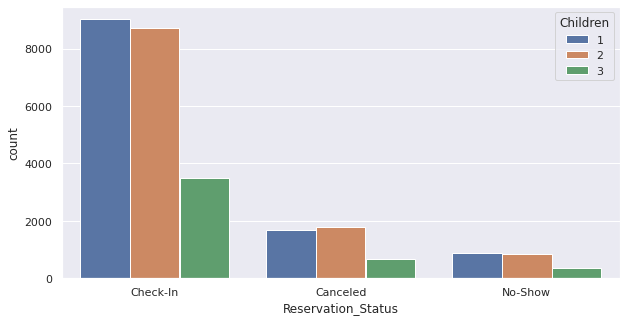

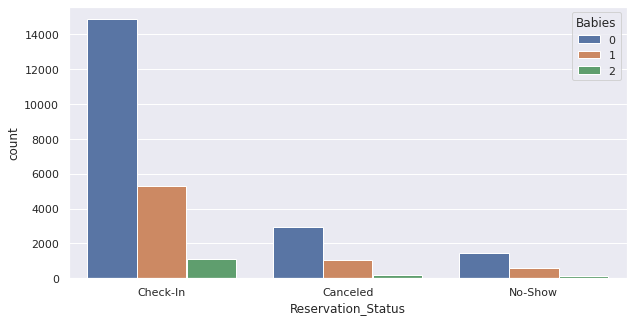

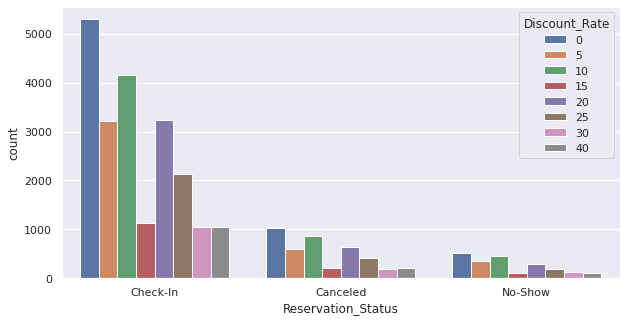

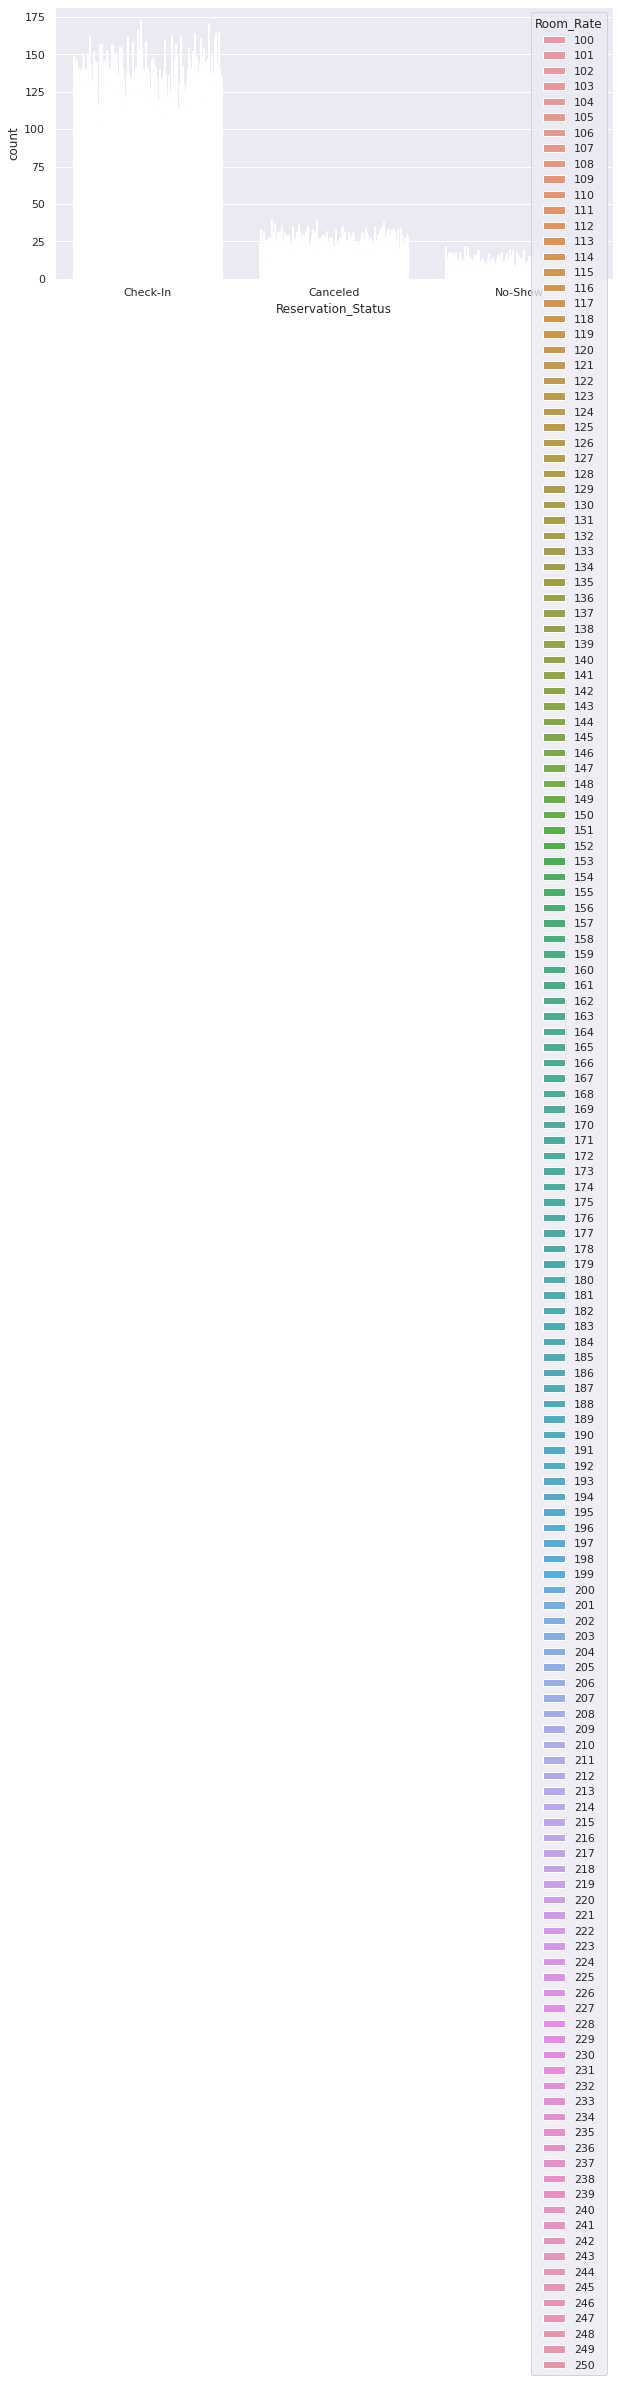

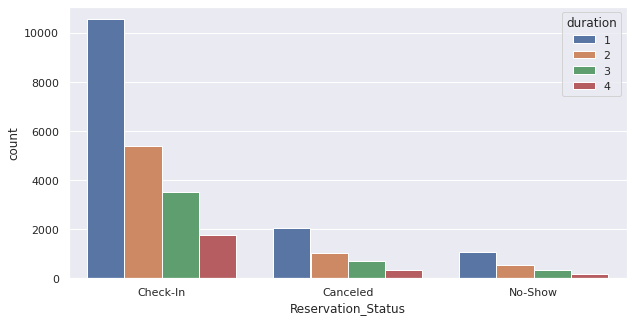

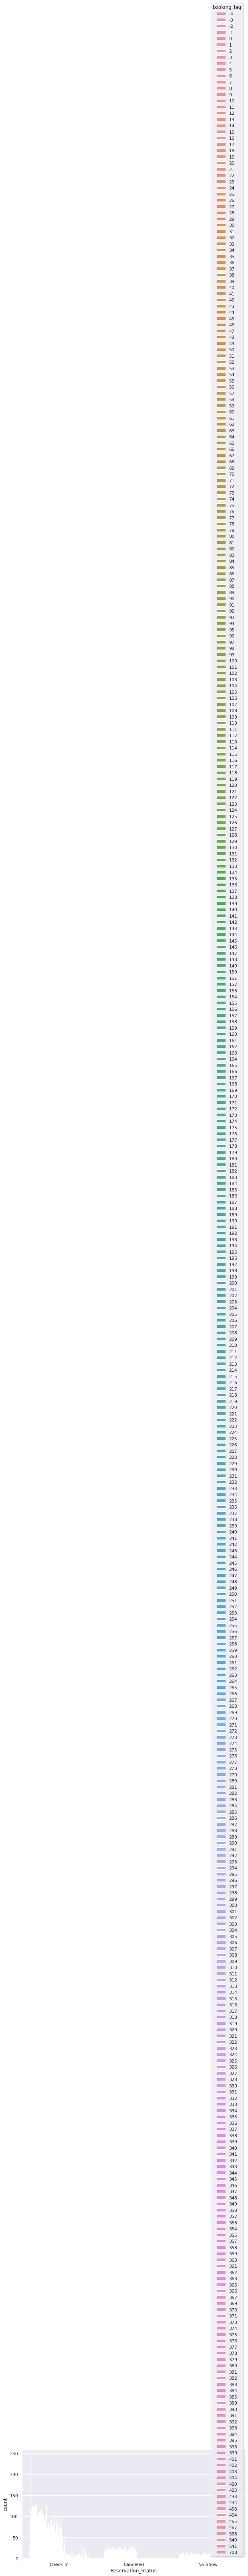

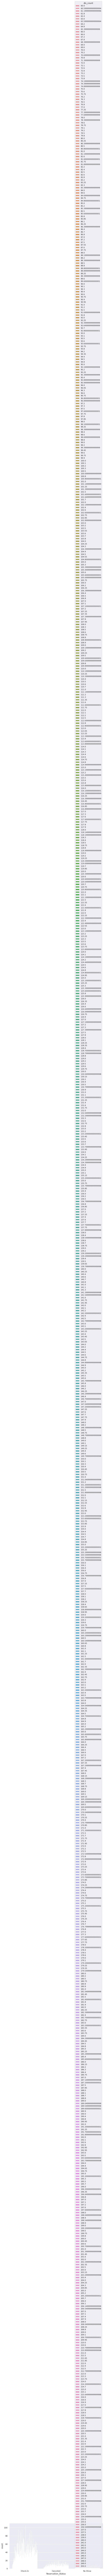

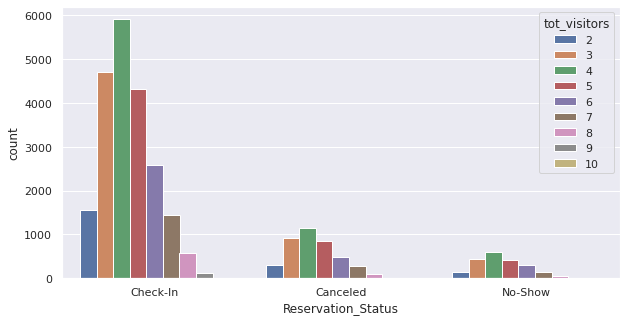

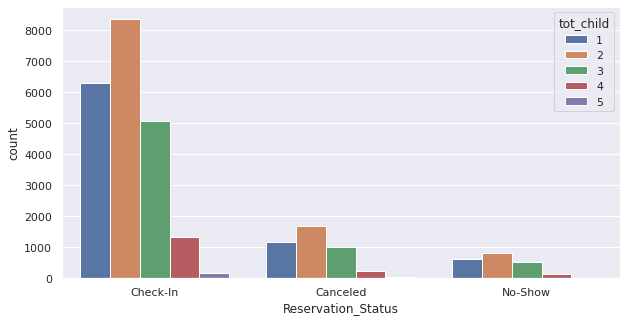

In [59]:
for i,cat in enumerate(continuous+Engineered_cont):
    plt.figure(i, figsize=(10,5))
    sns.countplot(x=target, hue=cat, data=train_df)

In [60]:
for cat_ in Engineered_cat+Engineered_cont:
  for orgdf, outdf in zip([train_df, valid_df, test_df], processed_dfs):
    outdf[cat_] = orgdf[cat_].astype('int64')

Check the following variables by categorizing as follows:

1.   Hotel_Type - Hotel vs. Resort
2.   Booking_Type - combine online and direct
3.   Educational_Level - combine Grad and High-College
4.   Income - combine 25k-50k with 50k-100k



In [61]:
def hotel_vs_resort(val):
  Hotel_Type = ['City Hotel', 'Airport Hotels', 'Resort']
  if val == map_dicts['Hotel_Type'][Hotel_Type[2]]:
    return 0
  else:
    return 1

In [62]:
def book_cats(val):
  Booking_channel = ['Online', 'Agent', 'Direct']

  if val == map_dicts['Booking_channel'][Booking_channel[1]]:
    return 1
  else:
    return 0

In [63]:
def edu_to_cat(val):
  Educational_Level = ['Grad', 'Mid-School', 'College', 'High-School']

  if val == map_dicts['Educational_Level'][Educational_Level[1]]:
    return 0
  elif val == map_dicts['Educational_Level'][Educational_Level[2]]:
    return 1
  else:
    return 2

In [64]:
def income_cat(val):
  Income = ['<25K', '50K -- 100K', '>100K', '25K --50K']
  if val == map_dicts['Income'][Income[0]]:
    return 0
  elif val == map_dicts['Income'][Income[2]]:
    return 2
  else:
    return 1

In [65]:
for df in processed_dfs:
  df['Hotel_Resort'] = df['Hotel_Type'].map(lambda x: hotel_vs_resort(x))
  df['Booking_Type'] = df['Booking_channel'].map(lambda x: book_cats(x))
  df['Educational_Cats'] = df['Educational_Level'].map(lambda x: edu_to_cat(x))
  df['Income_Cats'] = df['Income'].map(lambda x: income_cat(x))

In [66]:
New_cats = ['Hotel_Resort', 'Booking_Type', 'Educational_Cats', 'Income_Cats']

In [67]:
train_df[New_cats] = processed_train[New_cats]

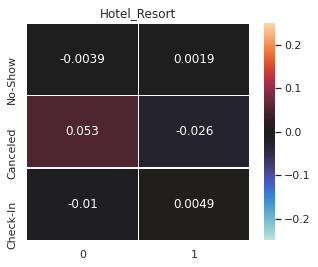

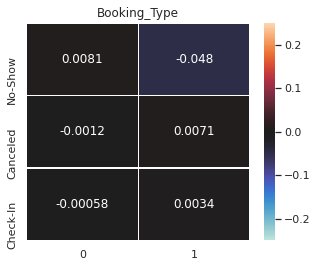

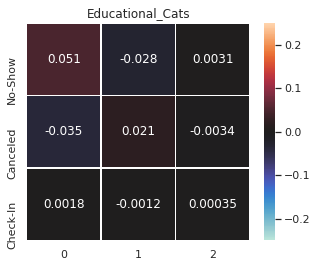

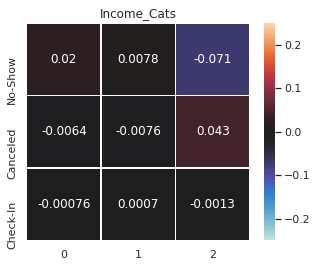

In [68]:
target = 'Reservation_Status'
for i, cat in enumerate(New_cats):
    g = normalize_for_plot(train_df, cat, target)
    plt.figure(i, figsize=(5,4))
    sns.heatmap(g, linewidths=0.5, vmin = -0.25, vmax = 0.25, center = 0.0, annot=True).set_title(cat)

In [69]:
processed_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  27499 non-null  int64  
 1   Age                     27499 non-null  int64  
 2   Ethnicity               27499 non-null  int64  
 3   Educational_Level       27499 non-null  int64  
 4   Income                  27499 non-null  int64  
 5   Country_region          27499 non-null  int64  
 6   Hotel_Type              27499 non-null  int64  
 7   Adults                  27499 non-null  int64  
 8   Children                27499 non-null  int64  
 9   Babies                  27499 non-null  int64  
 10  Meal_Type               27499 non-null  int64  
 11  Visted_Previously       27499 non-null  int64  
 12  Previous_Cancellations  27499 non-null  int64  
 13  Deposit_type            27499 non-null  int64  
 14  Booking_channel         27499 non-null

## Feature Selection

### Distribution Cross-Check

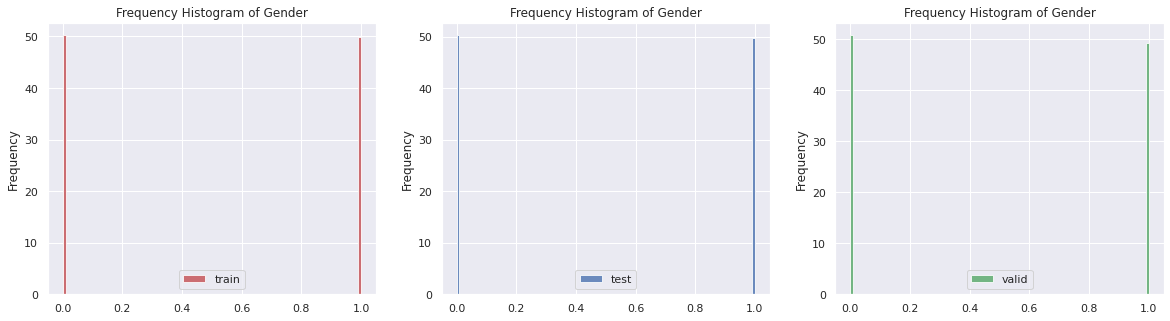

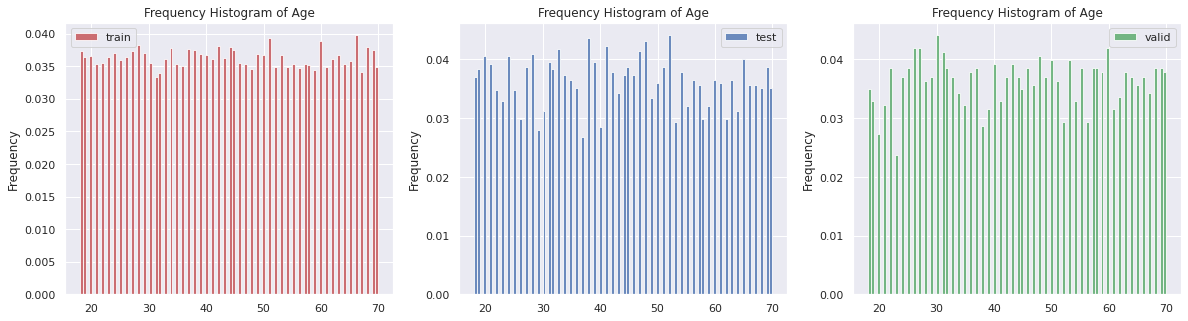

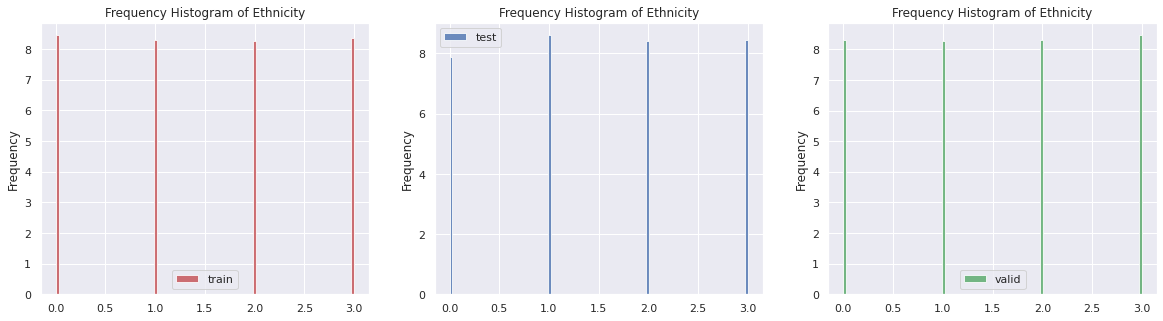

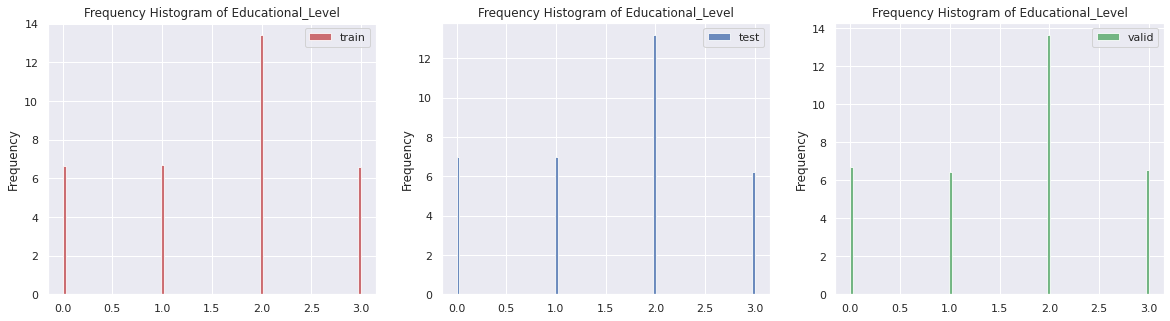

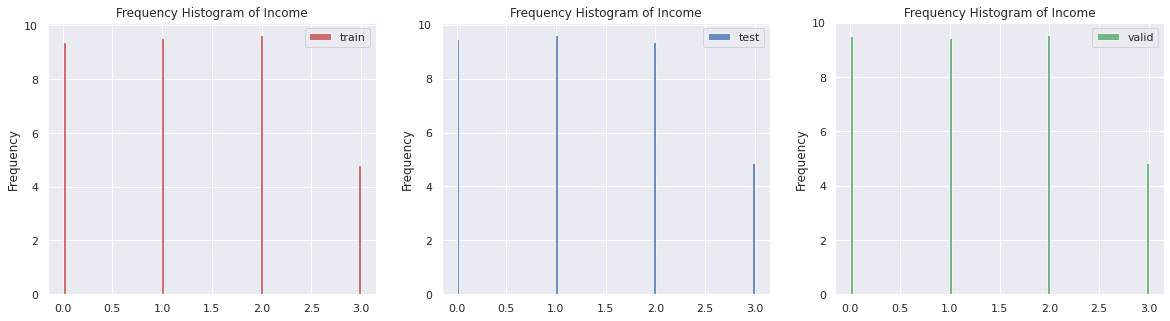

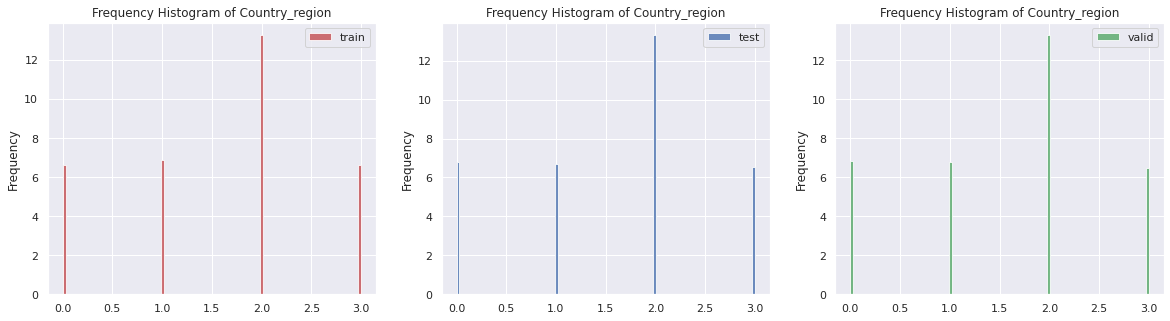

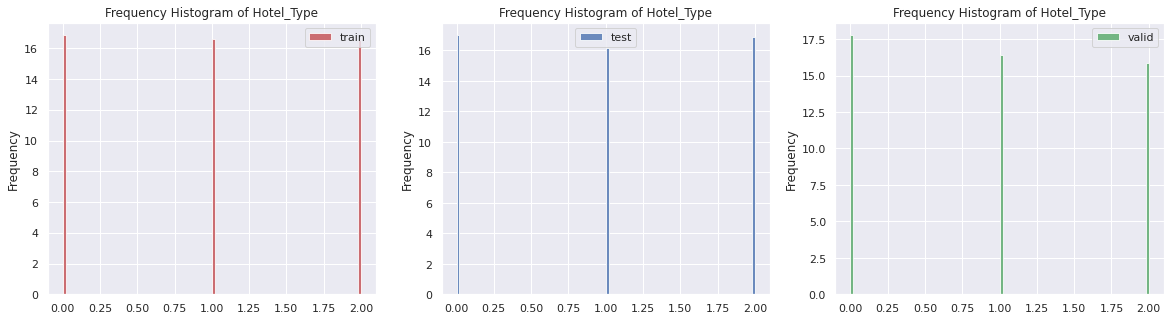

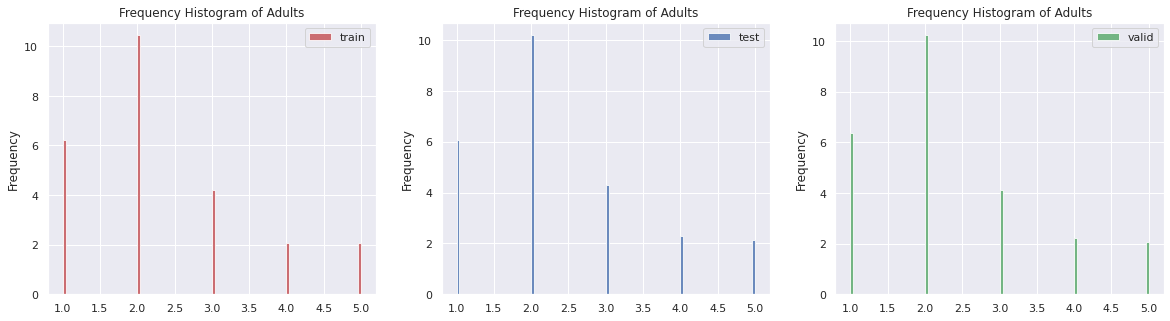

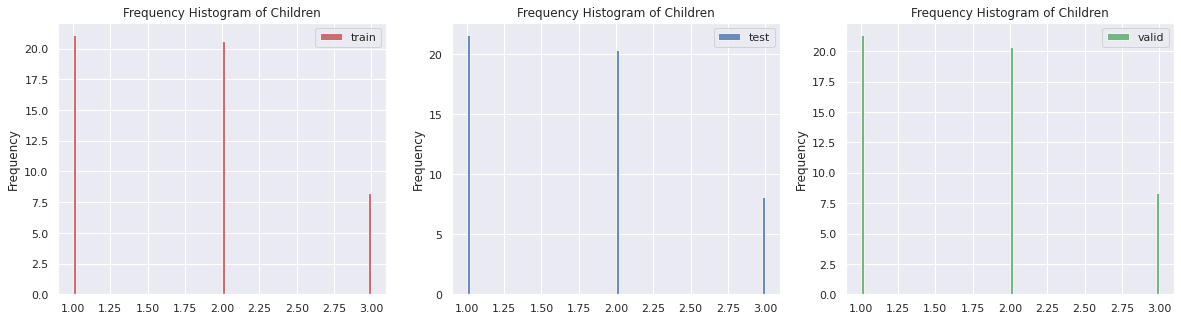

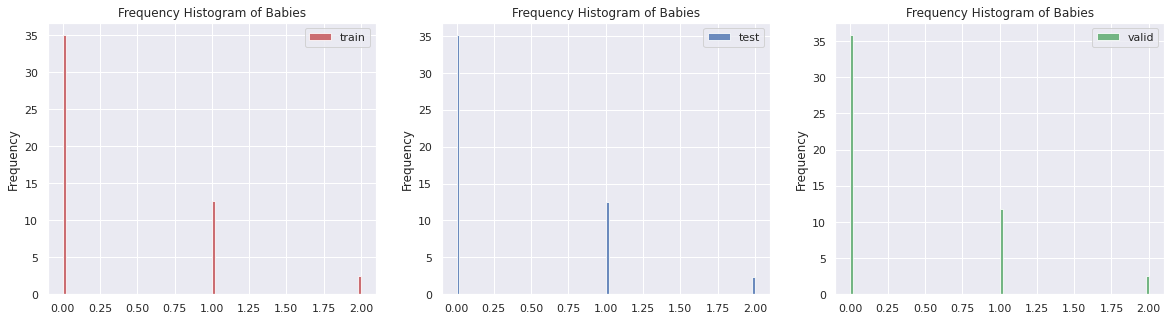

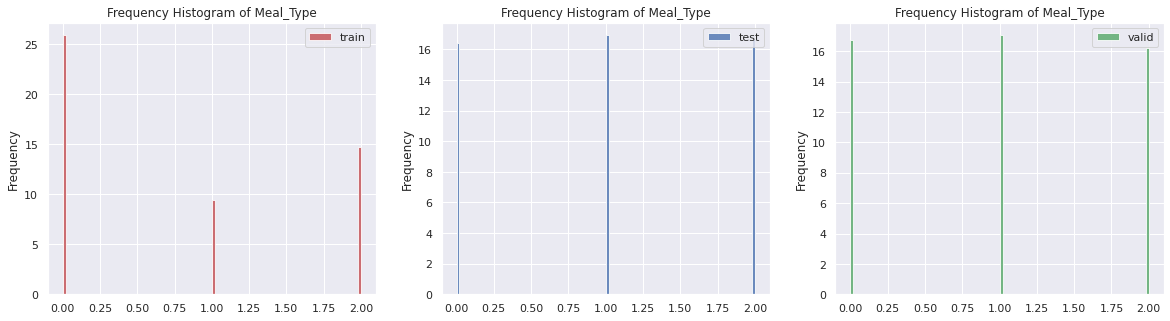

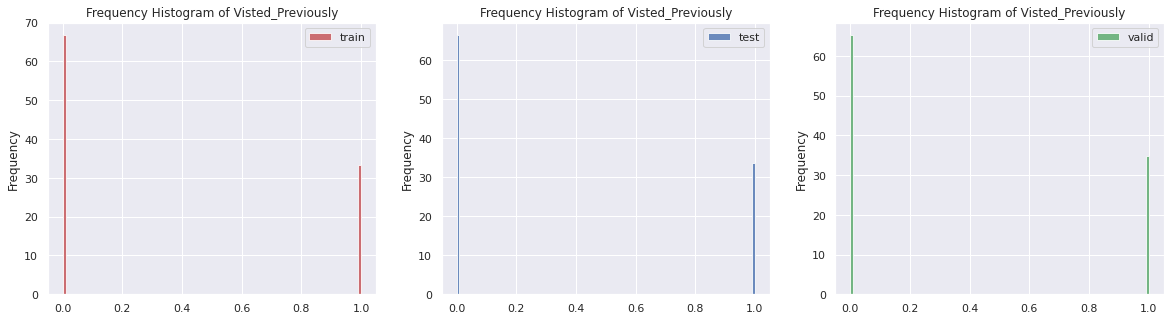

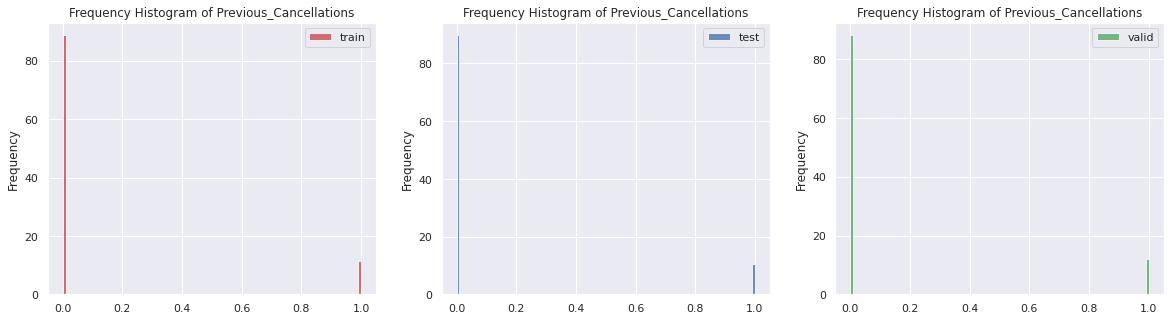

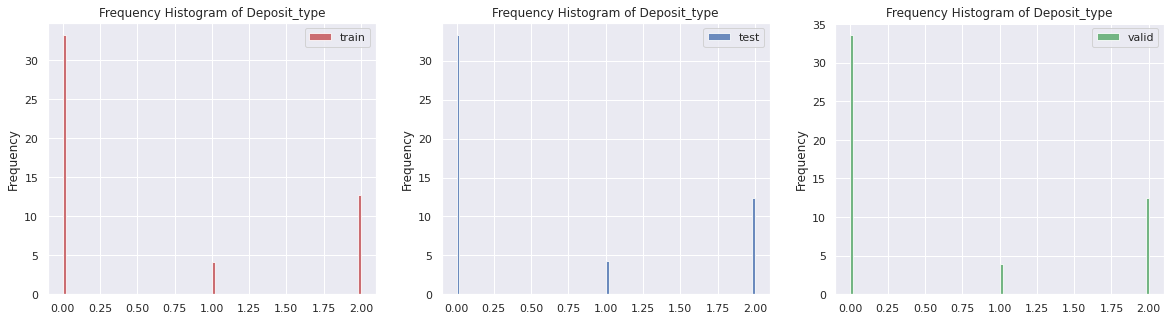

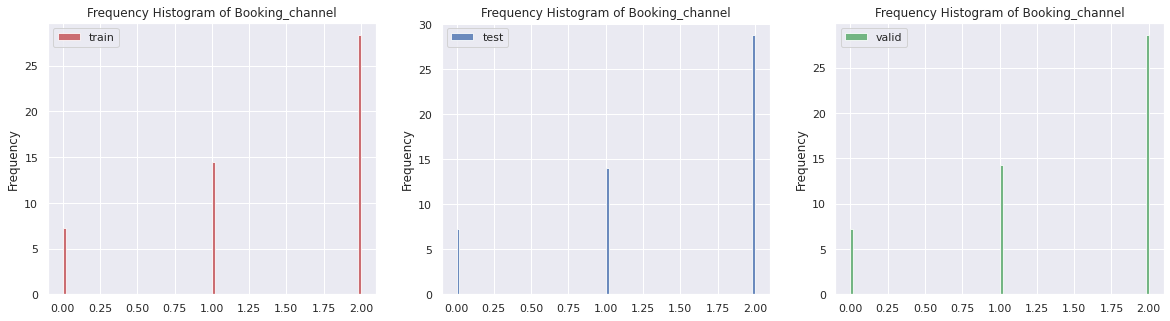

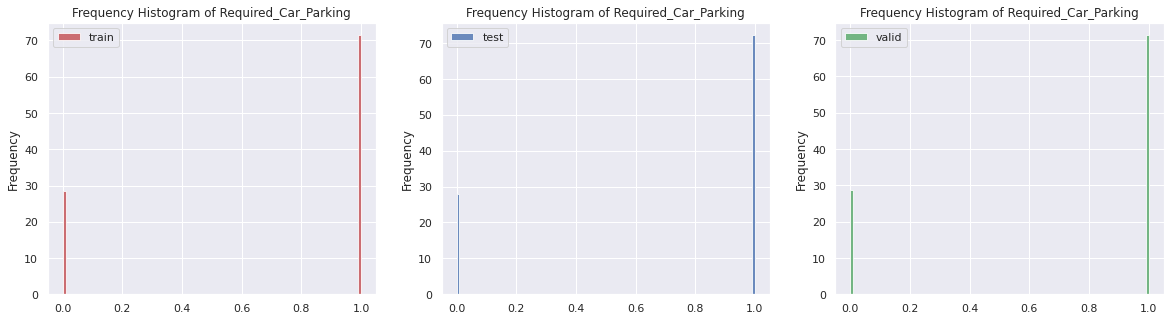

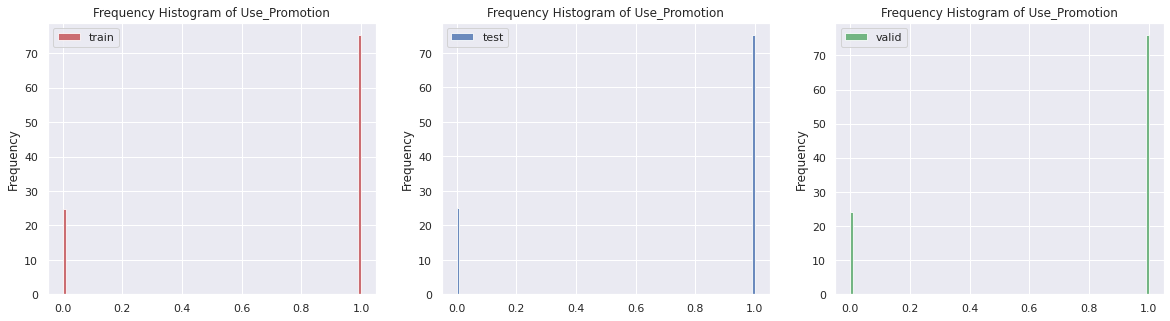

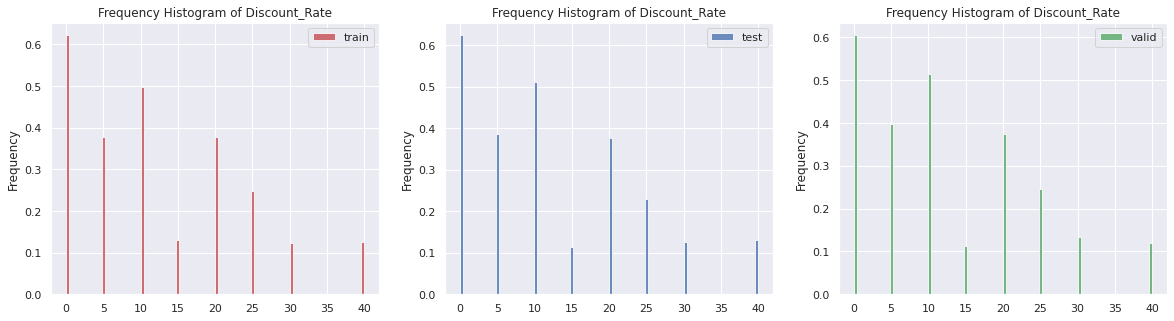

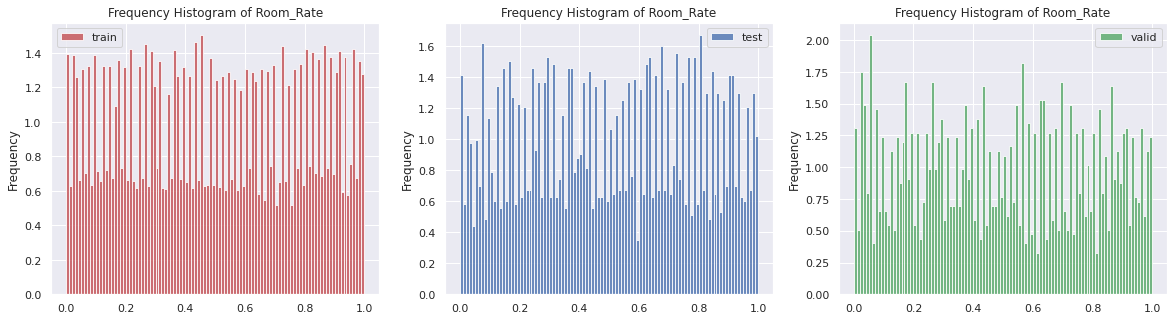

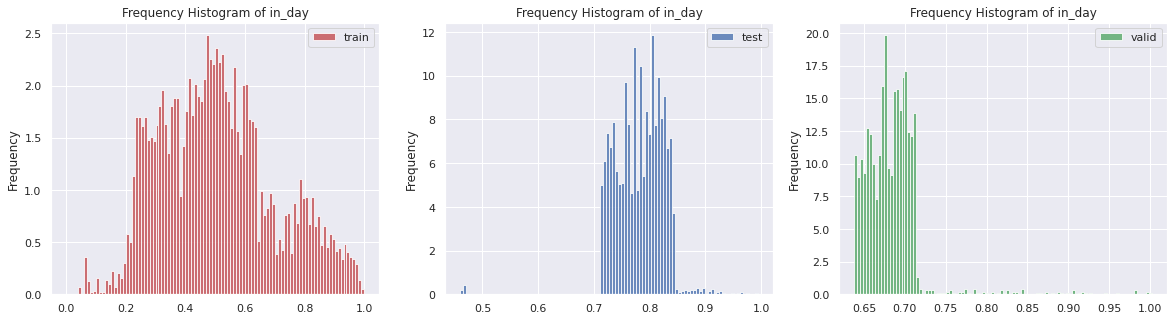

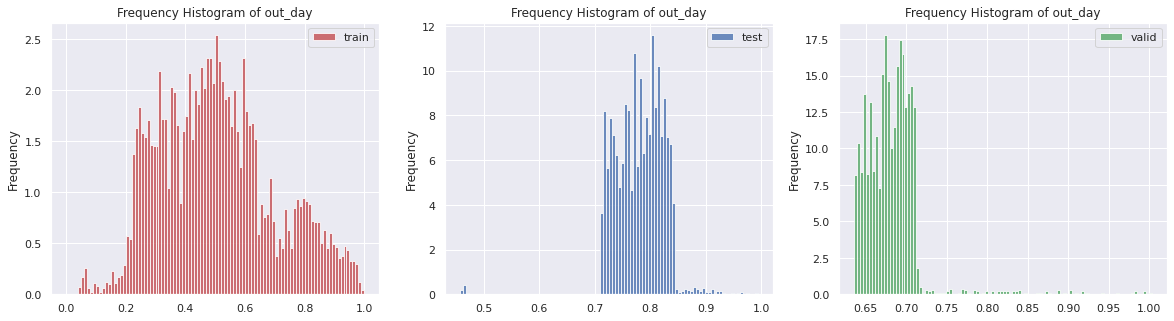

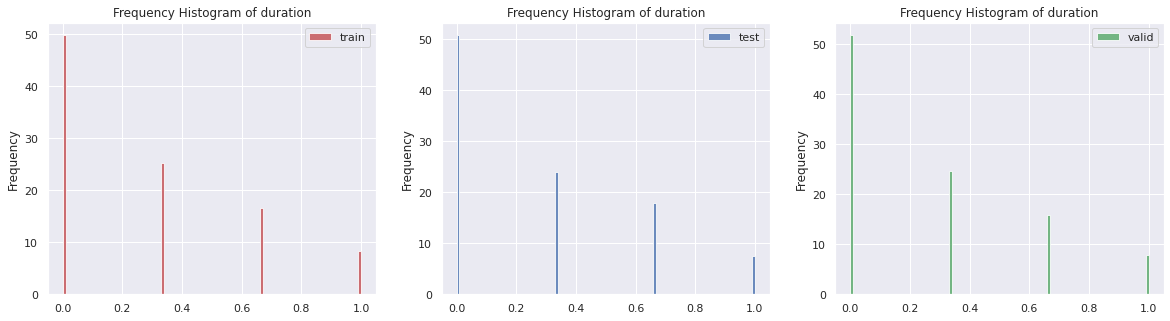

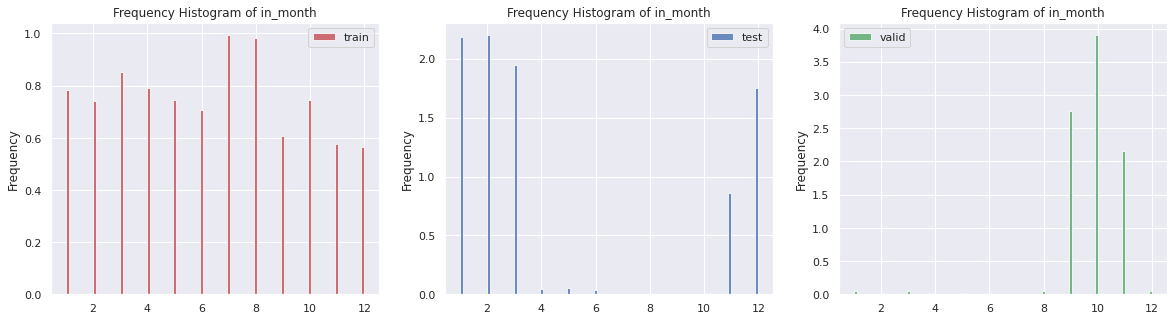

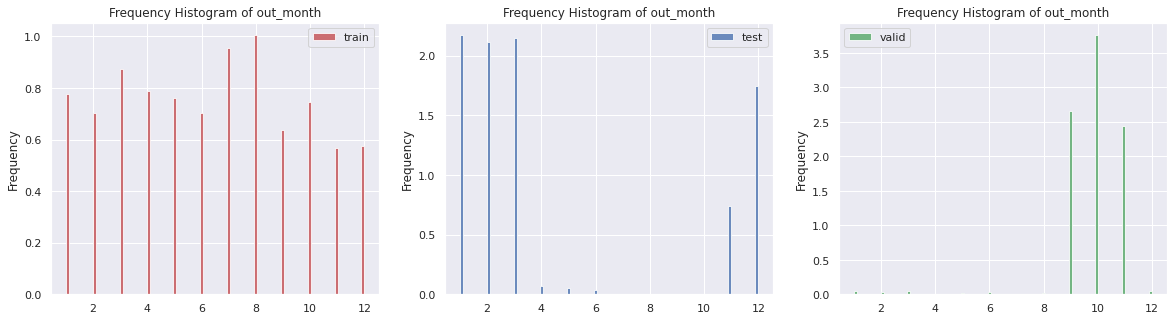

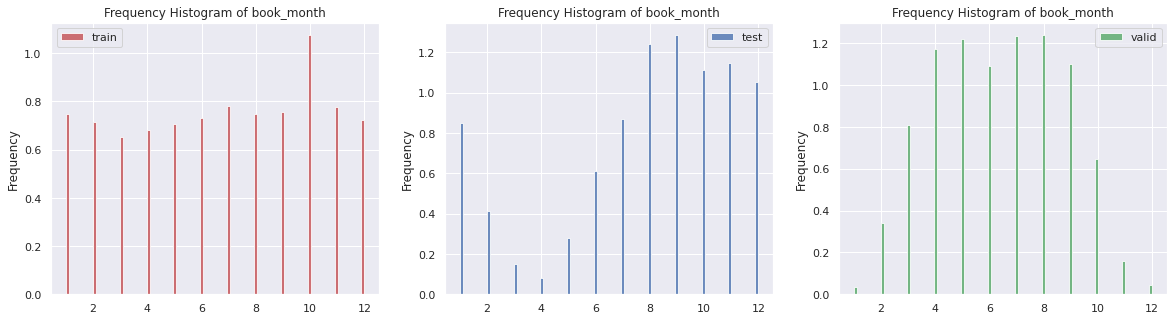

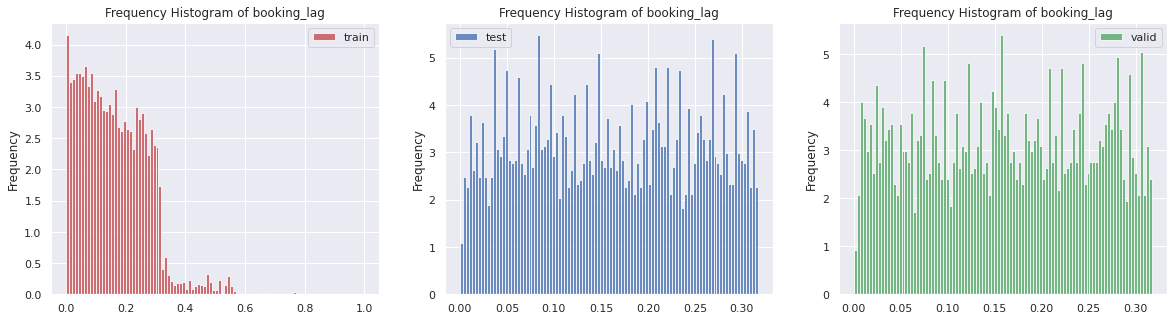

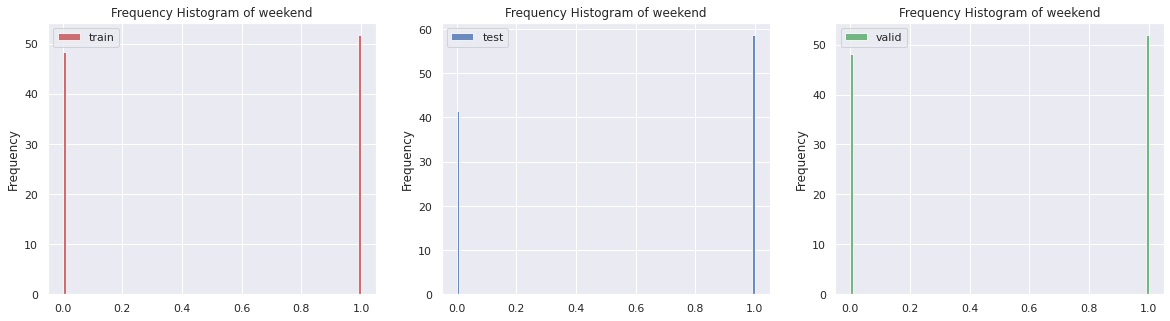

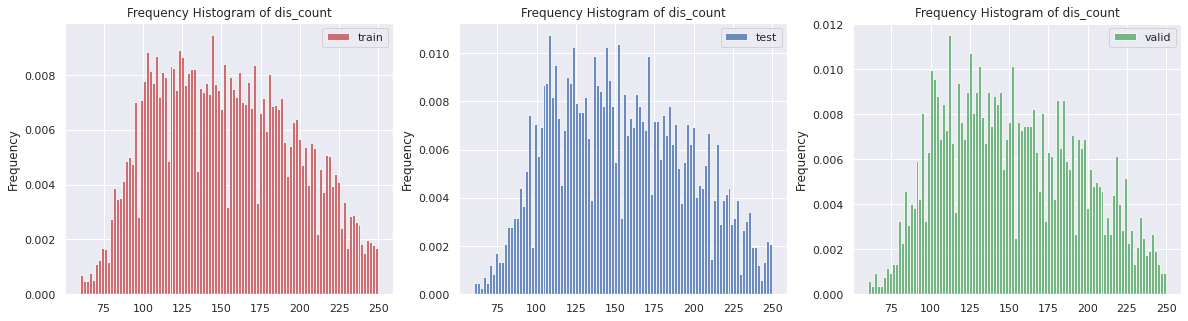

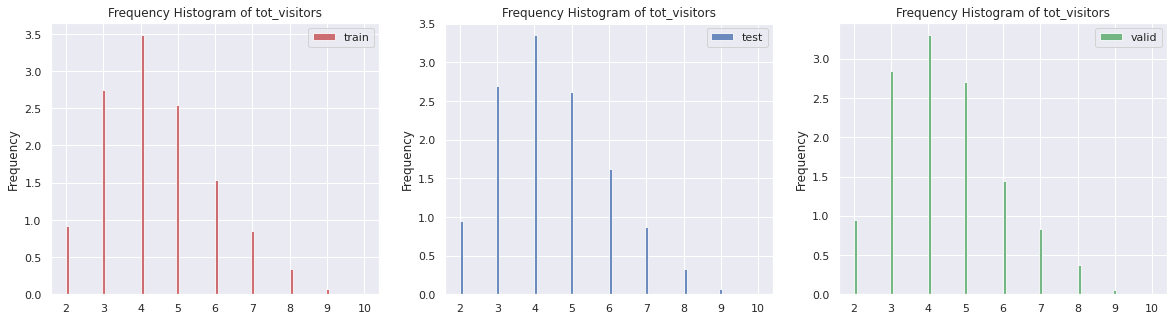

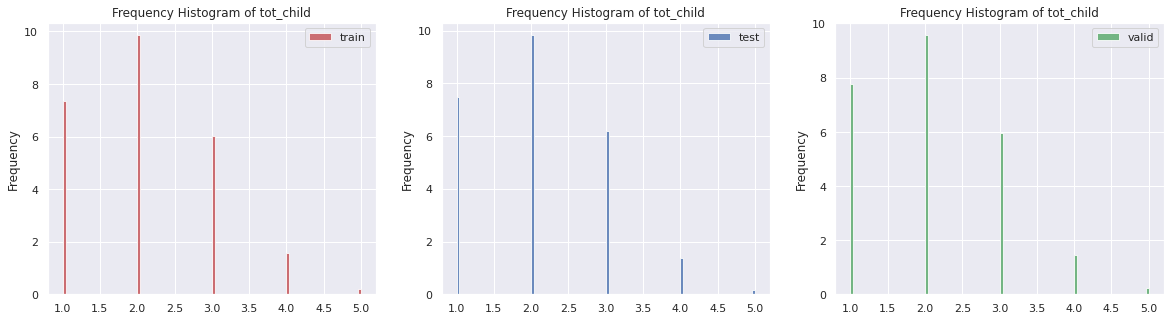

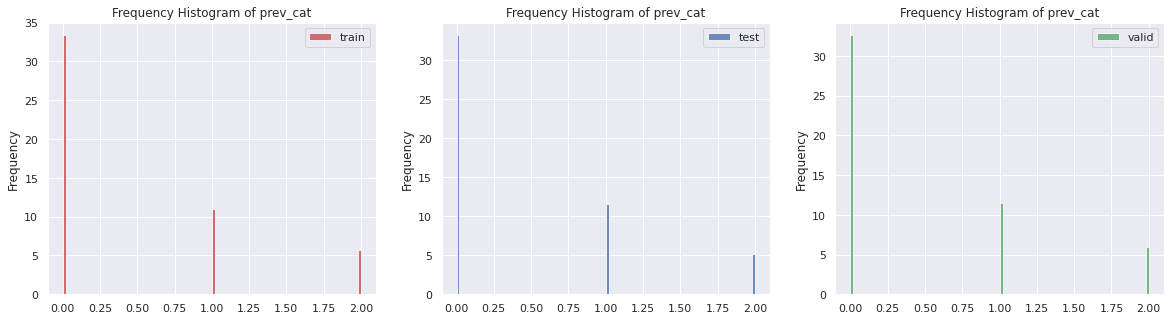

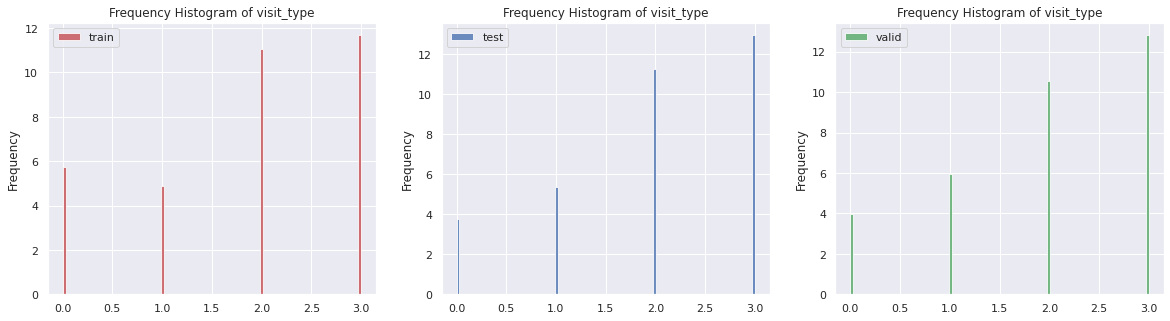

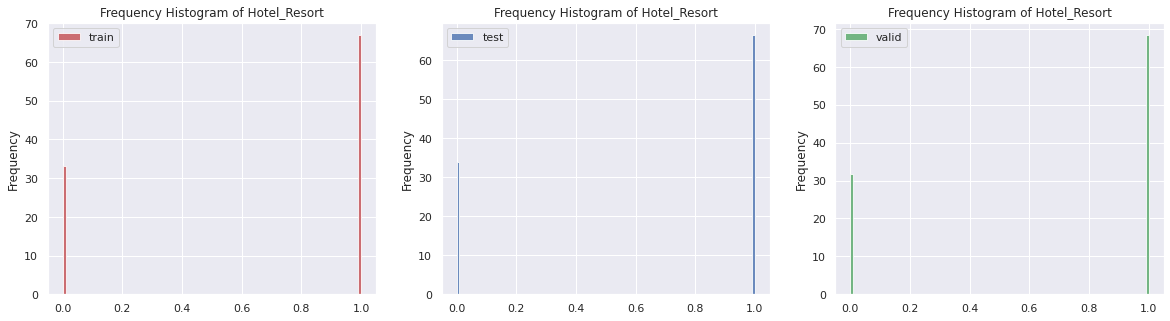

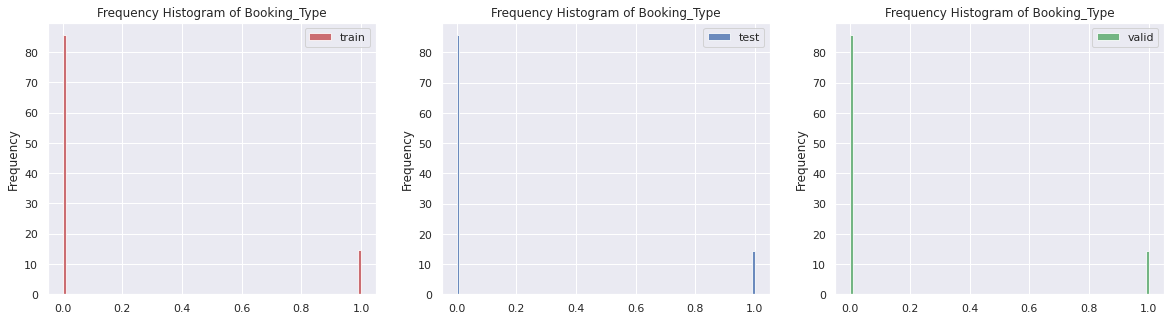

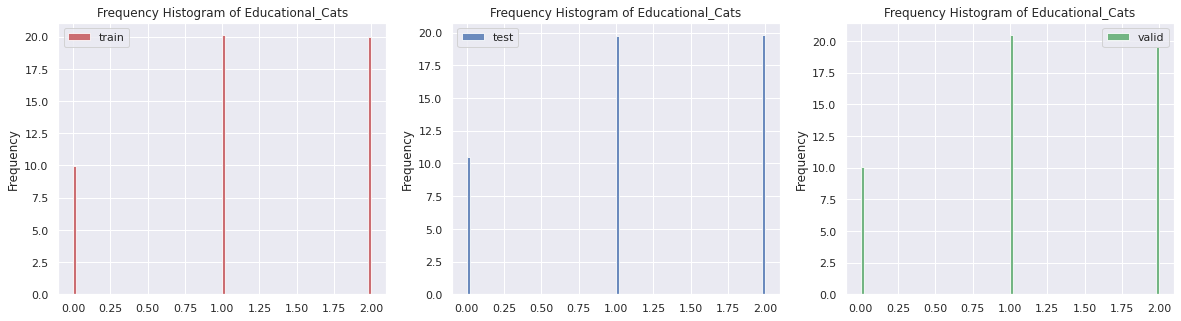

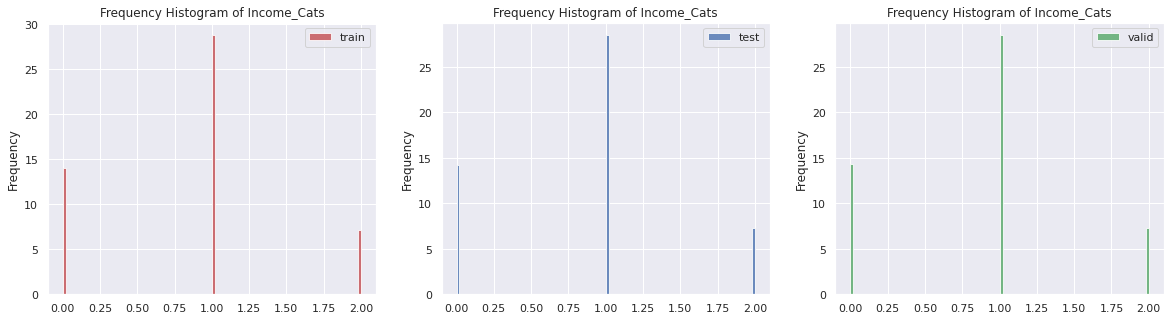

In [70]:
kwargs = dict(alpha=0.8, bins=100)

for cat_ in processed_test.columns:
  train_sort = processed_train.sort_values(cat_)
  test_sort = processed_test.sort_values(cat_)
  valid_sort = processed_val.sort_values(cat_)

  plot_train = train_sort.loc[:,cat_]
  plot_test = test_sort.loc[:, cat_]
  plot_valid = valid_sort.loc[:,cat_]

  plt.figure(i, figsize=(20,5))
  plt.subplot(1,3,1)
  plt.hist(plot_train, **kwargs, color='r', label='train', density=True)
  plt.legend()
  plt.gca().set(title=f'Frequency Histogram of {cat_}', ylabel='Frequency')

  plt.subplot(1,3,2)
  plt.hist(plot_test, **kwargs, color='b', label='test', density=True)
  plt.legend()
  plt.gca().set(title=f'Frequency Histogram of {cat_}', ylabel='Frequency')

  plt.subplot(1,3,3)
  plt.hist(plot_valid, **kwargs, color='g', label='valid', density=True)
  plt.gca().set(title=f'Frequency Histogram of {cat_}', ylabel='Frequency')
  plt.legend()

  plt.show()

In [71]:
Diff_distributions = ["Age", "Meal_Type", "Room_Rate", "in_day", "out_day", "in_month",
                      "out_month", "book_month", "booking_lag", "visit_type"]

# Droping the columns with different distributions

for df in processed_dfs:
  for diff_cat in Diff_distributions:
    df.drop(diff_cat, inplace = True, axis = 1, errors='ignore')

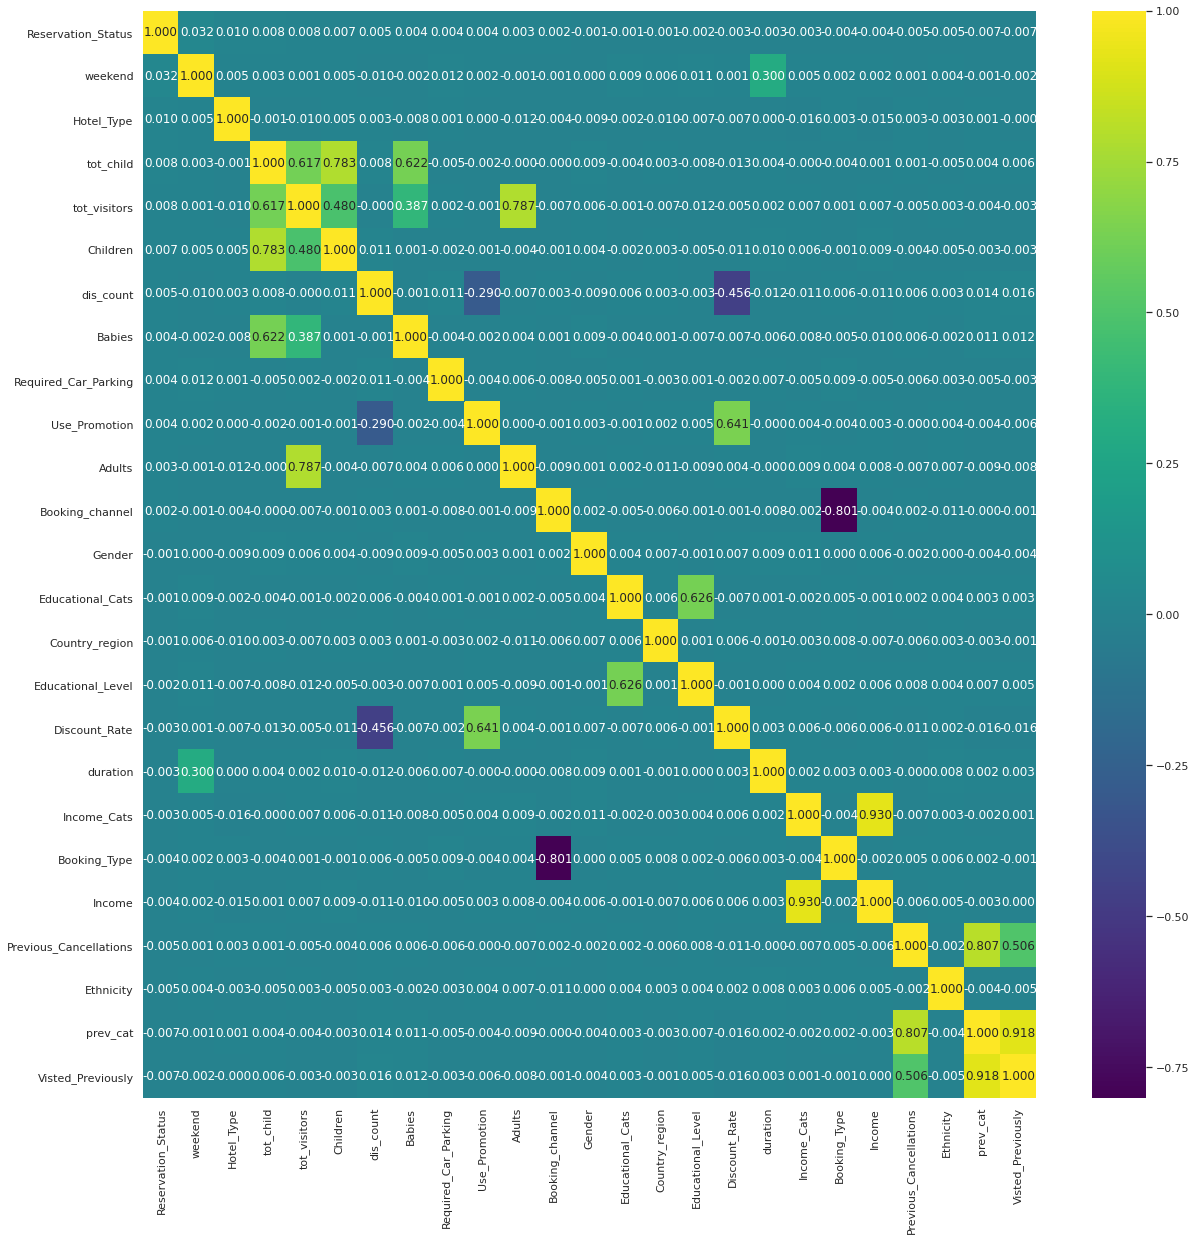

In [72]:
k = 25
cols = processed_train.corr().nlargest(k, 'Reservation_Status')['Reservation_Status'].index
cm = processed_train[cols].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, cmap = 'viridis', fmt = ".3f")

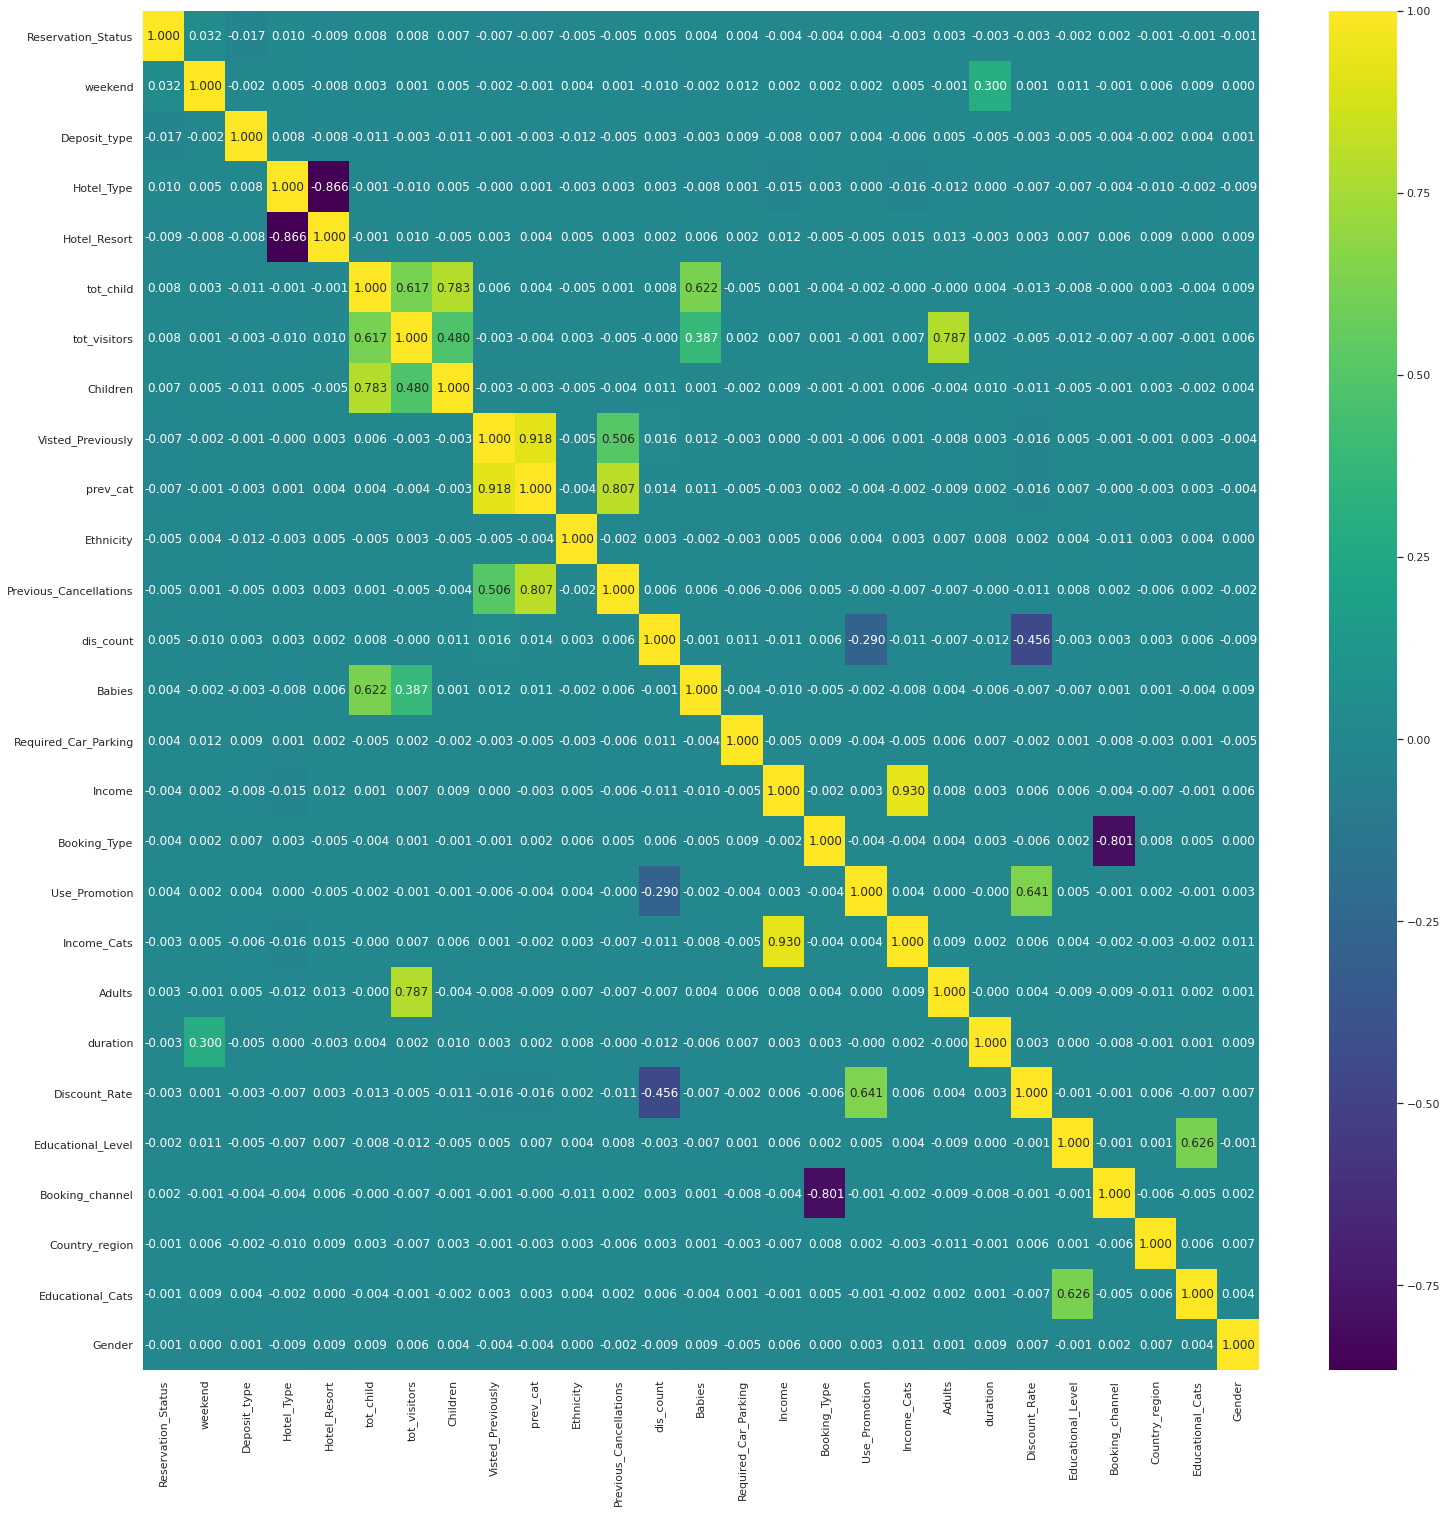

In [73]:
k = 36
cols = processed_train.corr().abs().nlargest(k, 'Reservation_Status')['Reservation_Status'].index
cm = processed_train[cols].corr()
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True, cmap = 'viridis', fmt = ".3f")

In [74]:
processed_val.columns

Index(['Gender', 'Ethnicity', 'Educational_Level', 'Income', 'Country_region',
       'Hotel_Type', 'Adults', 'Children', 'Babies', 'Visted_Previously',
       'Previous_Cancellations', 'Deposit_type', 'Booking_channel',
       'Required_Car_Parking', 'Reservation_Status', 'Use_Promotion',
       'Discount_Rate', 'duration', 'weekend', 'dis_count', 'tot_visitors',
       'tot_child', 'prev_cat', 'Hotel_Resort', 'Booking_Type',
       'Educational_Cats', 'Income_Cats'],
      dtype='object')

In [75]:
#Select_cont = [ "Hotel_Type", "Required_Car_Parking",  "weekend", "Use_Promotion",
#                "dis_count", "tot_child", "Income", "Booking_Type", "prev_cat", 
#                "Ethnicity", "Adults"]


Select_cont = [   "Hotel_Type",
                  "Required_Car_Parking",
                  "weekend",
                  "Use_Promotion",
                  "dis_count",
                  "tot_child",
                  "Income",
                  "Booking_Type",
                  "Visted_Previously",
                  #"prev_cat",
                  "Ethnicity"]
# Select_cont = processed_train.columns.tolist()
#Select_cont.remove(target)

#Select_cont = ["Educational_Cats", "Previous_Cancellations", "tot_child", "Use_Promotion", 
#              "Deposit_type", "weekend", "Income", "Hotel_Resort", "Ethnicity"]
              
Droped_High_Relation = ["Children", "Babies", "tot_visitors", "Hotel_Resort"]

trial_num = 'Best'

### UnderSampling/OverSampling

In [76]:
class_1 = processed_train[processed_train[target] == 1]
class_2 = processed_train[processed_train[target] == 2]
class_3 = processed_train[processed_train[target] == 3]

In [77]:
# Undersampling 
class_1_under = class_1.sample(class_2.shape[0]*2)
processed_train_under = pd.concat([class_1_under, class_2, class_3], axis=0)

In [78]:
# Oversampling
class_2_over = class_2.sample(class_1.shape[0], replace=True)
class_3_over = class_3.sample(class_1.shape[0], replace=True)

processed_train_over = pd.concat([class_1, class_2_over, class_3_over], axis=0)

### Classification Plots

In [79]:
# visualizing using t-sne
from sklearn.manifold import TSNE
'''
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(processed_train[Select_cont].values)

processed_train['tsne-2d-one'] = tsne_results[:,0]
processed_train['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Reservation_Status",
    palette=sns.color_palette("hls", 3),
    data=processed_train,
    legend="full",
    alpha=0.3
)'''

'\ntsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)\ntsne_results = tsne.fit_transform(processed_train[Select_cont].values)\n\nprocessed_train[\'tsne-2d-one\'] = tsne_results[:,0]\nprocessed_train[\'tsne-2d-two\'] = tsne_results[:,1]\nplt.figure(figsize=(16,10))\nsns.scatterplot(\n    x="tsne-2d-one", y="tsne-2d-two",\n    hue="Reservation_Status",\n    palette=sns.color_palette("hls", 3),\n    data=processed_train,\n    legend="full",\n    alpha=0.3\n)'

In [80]:
'''
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(processed_train_under[Select_cont].values)

processed_train_under['tsne-2d-one'] = tsne_results[:,0]
processed_train_under['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Reservation_Status",
    palette=sns.color_palette("hls", 3),
    data=processed_train_under,
    legend="full",
    alpha=0.3
)'''

'\ntsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)\ntsne_results = tsne.fit_transform(processed_train_under[Select_cont].values)\n\nprocessed_train_under[\'tsne-2d-one\'] = tsne_results[:,0]\nprocessed_train_under[\'tsne-2d-two\'] = tsne_results[:,1]\nplt.figure(figsize=(16,10))\nsns.scatterplot(\n    x="tsne-2d-one", y="tsne-2d-two",\n    hue="Reservation_Status",\n    palette=sns.color_palette("hls", 3),\n    data=processed_train_under,\n    legend="full",\n    alpha=0.3\n)'

In [81]:
'''
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(processed_train_over[Select_cont].values)

processed_train_over['tsne-2d-one'] = tsne_results[:,0]
processed_train_over['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Reservation_Status",
    palette=sns.color_palette("hls", 3),
    data=processed_train_over,
    legend="full",
    alpha=0.3
)'''

'\ntsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)\ntsne_results = tsne.fit_transform(processed_train_over[Select_cont].values)\n\nprocessed_train_over[\'tsne-2d-one\'] = tsne_results[:,0]\nprocessed_train_over[\'tsne-2d-two\'] = tsne_results[:,1]\nplt.figure(figsize=(16,10))\nsns.scatterplot(\n    x="tsne-2d-one", y="tsne-2d-two",\n    hue="Reservation_Status",\n    palette=sns.color_palette("hls", 3),\n    data=processed_train_over,\n    legend="full",\n    alpha=0.3\n)'

## Model Fitting

### Model Building

In [82]:
x_train_norm = processed_train[Select_cont].copy()
y_train_norm = processed_train[target].copy()

x_train_under = processed_train_under[Select_cont].copy()
y_train_under = processed_train_under[target].copy()

x_train_over = processed_train_over[Select_cont].copy()
y_train_over = processed_train_over[target].copy()

x_valid = processed_val[Select_cont].copy()
y_valid = processed_val[target].copy()

x_test = processed_test[Select_cont].copy()

In [83]:
import tensorflow

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Dense, Dropout, Conv1D, LSTM, MaxPooling1D, Reshape
from keras.callbacks import ReduceLROnPlateau,EarlyStopping, ModelCheckpoint

In [84]:
model_dict = {}

In [85]:
xgbModel = XGBClassifier( objective="multi:softmax", 
                              max_depth = 3, 
                              min_samples_split = 2, 
                              n_estimators = 100)
model_dict['xgb'] = xgbModel

In [86]:
log_model = LogisticRegression( random_state=0, 
                                max_iter=1000,
                               class_weight = {1:0.1, 2:0.5,3:0.5},
                               solver = 'newton-cg',
                               multi_class = 'multinomial')
model_dict['logistic'] = log_model

In [87]:
gnb_model = GaussianNB()

model_dict['naive'] = gnb_model

In [88]:
cat_model = CatBoostClassifier( eval_metric='Accuracy',
                                colsample_bylevel=0.5,
                                max_depth=8,
                                n_estimators=500,
                                learning_rate=0.01,
                                use_best_model=True, 
                                random_seed=42)
model_dict['catb'] = cat_model

In [89]:
radom_ = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
model_dict['random'] = radom_

In [90]:
start_dim = 256
exp_dim = 4
pool_dim = 2
n_classes = 3

model = Sequential()
model.add(Dense(start_dim, input_dim=len(Select_cont), activation='relu'))
model.add(Reshape((exp_dim, start_dim//exp_dim)))
model.add(Conv1D(filters = start_dim//2, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size = pool_dim))
model.add(Conv1D(filters = start_dim//(2*pool_dim), kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size = pool_dim))
model.add(LSTM(start_dim//(2*pool_dim*pool_dim)))
model.add(Dense(start_dim//(2*2*pool_dim*pool_dim), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(start_dim//(2*2*2*pool_dim*pool_dim), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(n_classes, activation='softmax'))

early_stop = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True)
reducer = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=2)
callbacks = [early_stop, reducer]

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

model_dict['NN'] = model

### Model Fitting

In [91]:
def output_csv( preds, data_dir = "./gdrive/MyDrive/DataStorm-2.0/datasets", 
                out_name = 'output', keys = test_df['Reservation-id'].tolist(), 
                write = False):
  out_df = pd.DataFrame(list(zip(keys, preds)), 
               columns =['Reservation-id', 'Reservation_Status'])
  
  if write:
    out_df.to_csv(f'{data_dir}/{out_name}.csv', index=False)
  
  return out_df.Reservation_Status.unique()

In [92]:
modes = ['Normal', 'UnderSampled', 'OverSampled']
results = {}

Processing Normal
F1 score: 24.62%


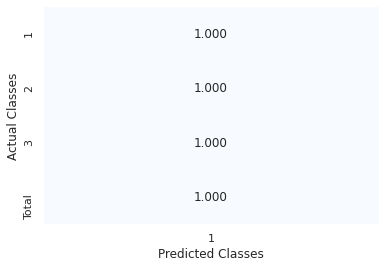

Processing UnderSampled
F1 score: 24.68%


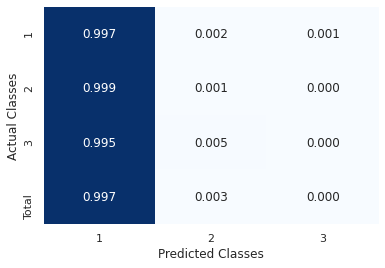

Processing OverSampled
F1 score: 31.96%


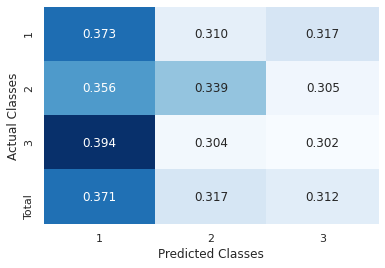

In [93]:
mod = 'xgb'
results[mod] = []
for i, dataset in enumerate([[x_train_norm, y_train_norm], [x_train_under, y_train_under], [x_train_over, y_train_over]]):
  print(f'Processing {modes[i]}')
  x_train = dataset[0]
  y_train = dataset[1]

  model_dict[mod].fit(x_train, y_train)
  norm_valid = model_dict[mod].predict(x_valid)

  f1_score = sk.metrics.f1_score(y_valid, norm_valid, average='macro')
  print("F1 score: %.2f%%"%(f1_score * 100.0))

  y_test = model_dict[mod].predict(x_test)
  uniq = output_csv(preds = y_test)
  if len(uniq) == 3:
    temp = {'score': f1_score, 'mode': modes[i], 'preds': y_test}
    results[mod].append(temp)

  plt.figure()
  sns.heatmap(pd.crosstab(y_valid, norm_valid, rownames=['Actual Classes'], colnames=['Predicted Classes'], margins=True, margins_name="Total", normalize='index'), 
  cmap="Blues", annot=True, fmt = '.3f', cbar=False)
  plt.show()

Processing Normal
F1 score: 30.93%


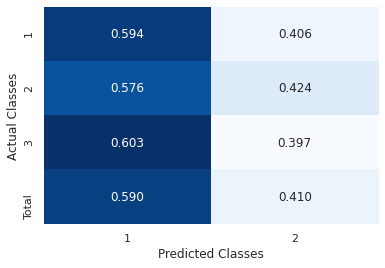

Processing UnderSampled
F1 score: 14.15%


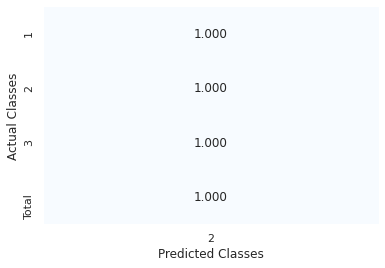

Processing OverSampled
F1 score: 19.78%


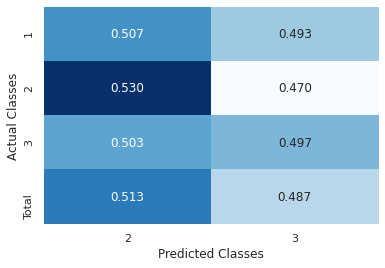

In [94]:
mod = 'logistic'
results[mod] = []
for i, dataset in enumerate([[x_train_norm, y_train_norm], [x_train_under, y_train_under], [x_train_over, y_train_over]]):
  print(f'Processing {modes[i]}')
  x_train = dataset[0]
  y_train = dataset[1]

  model_dict[mod].fit(x_train, y_train)
  norm_valid = model_dict[mod].predict(x_valid)

  f1_score = sk.metrics.f1_score(y_valid, norm_valid, average='macro')
  print("F1 score: %.2f%%"%(f1_score * 100.0))

  y_test = model_dict[mod].predict(x_test)
  uniq = output_csv(preds = y_test)
  if len(uniq) == 3:
    temp = {'score': f1_score, 'mode': modes[i], 'preds': y_test}
    results[mod].append(temp)

  plt.figure()
  sns.heatmap(pd.crosstab(y_valid, norm_valid, rownames=['Actual Classes'], colnames=['Predicted Classes'], margins=True, margins_name="Total", normalize='index'), 
  cmap="Blues", annot=True, fmt = '.3f', cbar=False)
  plt.show()

Processing Normal
F1 score: 24.62%


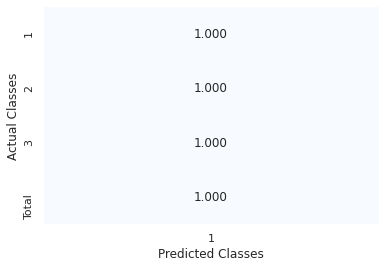

Processing UnderSampled
F1 score: 24.62%


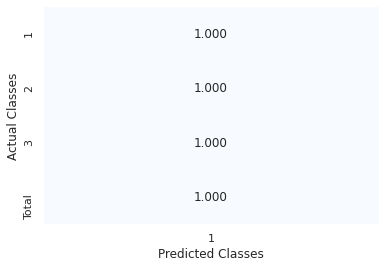

Processing OverSampled
F1 score: 32.52%


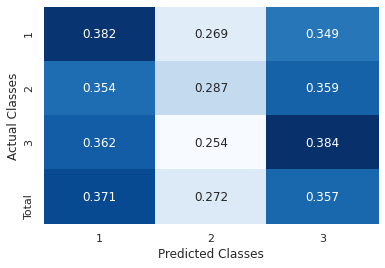

In [95]:
mod = 'naive'
results[mod] = []
for i, dataset in enumerate([[x_train_norm, y_train_norm], [x_train_under, y_train_under], [x_train_over, y_train_over]]):
  print(f'Processing {modes[i]}')
  x_train = dataset[0]
  y_train = dataset[1]

  model_dict[mod].fit(x_train, y_train)
  norm_valid = model_dict[mod].predict(x_valid)

  f1_score = sk.metrics.f1_score(y_valid, norm_valid, average='macro')
  print("F1 score: %.2f%%"%(f1_score * 100.0))

  y_test = model_dict[mod].predict(x_test)
  uniq = output_csv(preds = y_test)
  if len(uniq) == 3:
    temp = {'score': f1_score, 'mode': modes[i], 'preds': y_test}
    results[mod].append(temp)

  plt.figure()
  sns.heatmap(pd.crosstab(y_valid, norm_valid, rownames=['Actual Classes'], colnames=['Predicted Classes'], margins=True, margins_name="Total", normalize='index'), 
  cmap="Blues", annot=True, fmt = '.3f', cbar=False)
  plt.show()

Processing Normal
F1 score: 24.62%


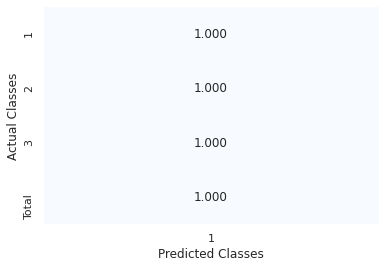

Processing UnderSampled
F1 score: 24.62%


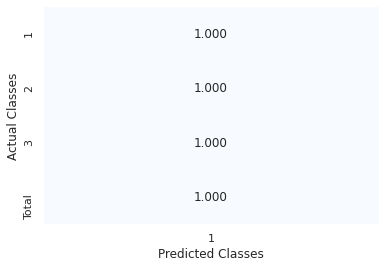

Processing OverSampled
F1 score: 34.83%


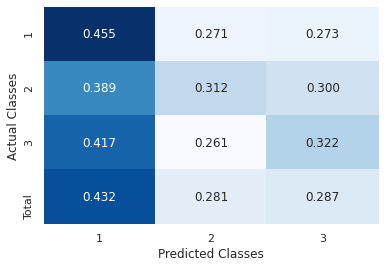

In [96]:
mod = 'catb'
results[mod] = []
for i, dataset in enumerate([[x_train_norm, y_train_norm], [x_train_under, y_train_under], [x_train_over, y_train_over]]):
  print(f'Processing {modes[i]}')
  x_train = dataset[0]
  y_train = dataset[1]

  model_dict[mod].fit(x_train, y_train, eval_set=(x_valid,y_valid), verbose = 0)
  norm_valid = model_dict[mod].predict(x_valid)

  f1_score = sk.metrics.f1_score(y_valid, norm_valid, average='macro')
  print("F1 score: %.2f%%"%(f1_score * 100.0))

  y_test = model_dict[mod].predict(x_test)
  uniq = output_csv(preds = y_test.flatten())
  if len(uniq) == 3:
    temp = {'score': f1_score, 'mode': modes[i], 'preds': y_test.flatten()}
    results[mod].append(temp)

  plt.figure()
  sns.heatmap(pd.crosstab(y_valid, norm_valid.flatten(), rownames=['Actual Classes'], colnames=['Predicted Classes'], margins=True, margins_name="Total", normalize='index'), 
  cmap="Blues", annot=True, fmt = '.3f', cbar=False)
  plt.show()

Processing Normal
F1 score: 29.38%


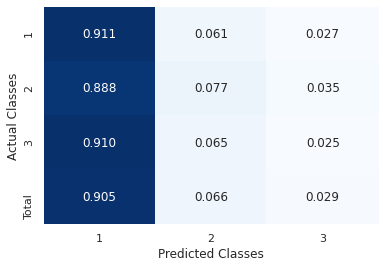

Processing UnderSampled
F1 score: 33.09%


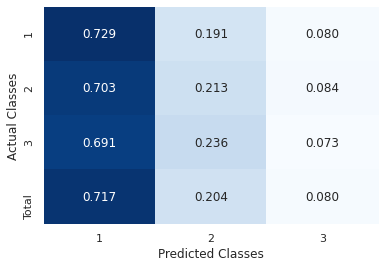

Processing OverSampled
F1 score: 31.67%


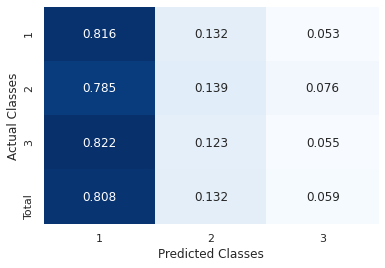

In [97]:
mod = 'random'
results[mod] = []
for i, dataset in enumerate([[x_train_norm, y_train_norm], [x_train_under, y_train_under], [x_train_over, y_train_over]]):
  print(f'Processing {modes[i]}')
  x_train = dataset[0]
  y_train = dataset[1]

  model_dict[mod].fit(x_train, y_train)
  norm_valid = model_dict[mod].predict(x_valid)

  f1_score = sk.metrics.f1_score(y_valid, norm_valid, average='macro')
  print("F1 score: %.2f%%"%(f1_score * 100.0))

  y_test = model_dict[mod].predict(x_test)
  uniq = output_csv(preds = y_test)
  if len(uniq) == 3:
    temp = {'score': f1_score, 'mode': modes[i], 'preds': y_test}
    results[mod].append(temp)

  plt.figure()
  sns.heatmap(pd.crosstab(y_valid, norm_valid, rownames=['Actual Classes'], colnames=['Predicted Classes'], margins=True, margins_name="Total", normalize='index'), 
  cmap="Blues", annot=True, fmt = '.3f', cbar=False)
  plt.show()

In [98]:
'''mod = 'NN'
results[mod] = []
for i, dataset in enumerate([[x_train_norm, y_train_norm], [x_train_under, y_train_under], [x_train_over, y_train_over]]):
  print(f'Processing {modes[i]}')
  x_train = dataset[0]
  y_train = dataset[1]

  model_dict[mod].fit(x_train, y_train-1, validation_data=(x_valid, y_valid-1) ,epochs=1000, batch_size=16, callbacks=callbacks, verbose = 0)
  norm_valid = model_dict[mod].predict(x_valid)

  _, accuracy = model_dict[mod].evaluate(x_valid, y_valid-1)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))

  y_test = np.argmax(model_dict[mod].predict(x_test), axis=-1) + 1
  uniq = output_csv(preds = y_test)
  if len(uniq) == 3:
    temp = {'score': accuracy, 'mode': modes[i], 'preds': y_test}
    results[mod].append(temp)

  plt.figure()
  sns.heatmap(pd.crosstab(y_valid, np.argmax(norm_valid, axis=1), rownames=['Actual Classes'], colnames=['Predicted Classes'], margins=True, margins_name="Total", normalize='index'), 
  cmap="Blues", annot=True, fmt = '.3f', cbar=False)
  plt.show()'''

'mod = \'NN\'\nresults[mod] = []\nfor i, dataset in enumerate([[x_train_norm, y_train_norm], [x_train_under, y_train_under], [x_train_over, y_train_over]]):\n  print(f\'Processing {modes[i]}\')\n  x_train = dataset[0]\n  y_train = dataset[1]\n\n  model_dict[mod].fit(x_train, y_train-1, validation_data=(x_valid, y_valid-1) ,epochs=1000, batch_size=16, callbacks=callbacks, verbose = 0)\n  norm_valid = model_dict[mod].predict(x_valid)\n\n  _, accuracy = model_dict[mod].evaluate(x_valid, y_valid-1)\n  print("Accuracy: %.2f%%" % (accuracy * 100.0))\n\n  y_test = np.argmax(model_dict[mod].predict(x_test), axis=-1) + 1\n  uniq = output_csv(preds = y_test)\n  if len(uniq) == 3:\n    temp = {\'score\': accuracy, \'mode\': modes[i], \'preds\': y_test}\n    results[mod].append(temp)\n\n  plt.figure()\n  sns.heatmap(pd.crosstab(y_valid, np.argmax(norm_valid, axis=1), rownames=[\'Actual Classes\'], colnames=[\'Predicted Classes\'], margins=True, margins_name="Total", normalize=\'index\'), \n  cmap=

## Output

In [99]:
results

{'catb': [{'mode': 'OverSampled',
   'preds': array([3, 3, 3, ..., 1, 3, 3]),
   'score': 0.3483249390818976}],
 'logistic': [],
 'naive': [{'mode': 'OverSampled',
   'preds': array([3, 3, 2, ..., 1, 3, 1], dtype=int64),
   'score': 0.3252310335638223}],
 'random': [{'mode': 'Normal',
   'preds': array([3, 1, 1, ..., 1, 1, 1], dtype=int64),
   'score': 0.2938283510385349},
  {'mode': 'UnderSampled',
   'preds': array([2, 1, 1, ..., 1, 1, 1], dtype=int64),
   'score': 0.3309197492763804},
  {'mode': 'OverSampled',
   'preds': array([3, 1, 1, ..., 1, 1, 1], dtype=int64),
   'score': 0.3167128496920957}],
 'xgb': [{'mode': 'OverSampled',
   'preds': array([2, 3, 2, ..., 1, 3, 3], dtype=int64),
   'score': 0.31958326463192205}]}

In [100]:
def count_label(pred):
  unique, counts = np.unique(pred, return_counts=True)
  return dict(zip(unique, counts))

In [101]:
save_results = {}
for k, v in results.items():
  save_results[k] = []
  if len(v) == 0:
    continue
  for dict_ in v:
    save_results[k].append({key:value for key, value in dict_.items() if key == 'score'})
    score = dict_['score']
    mode = dict_['mode']
    print(f'{k} :: {score} :: {mode}')
    print(count_label(dict_['preds']))

xgb :: 0.31958326463192205 :: OverSampled
{1: 1406, 2: 1509, 3: 1403}
naive :: 0.3252310335638223 :: OverSampled
{1: 1333, 2: 1337, 3: 1648}
catb :: 0.3483249390818976 :: OverSampled
{1: 1544, 2: 1436, 3: 1338}
random :: 0.2938283510385349 :: Normal
{1: 3908, 2: 277, 3: 133}
random :: 0.3309197492763804 :: UnderSampled
{1: 3047, 2: 935, 3: 336}
random :: 0.3167128496920957 :: OverSampled
{1: 3476, 2: 550, 3: 292}


In [102]:
write_dict = {'Categories':Select_cont, 'results':save_results, 'Submission': ['catb_0']}

In [103]:
import json
with open(f'{data_dir}/trail_{trial_num}.json', 'w+') as f:
  json.dump(write_dict, f, indent=2)

In [104]:
y_test = results['catb'][0]['preds']
score = results['catb'][0]['score']
_ = output_csv(preds=y_test, out_name= f'catb_output_{score :.3f}', write=True)